# Assignment Nov 2019 Machine Learning and Statistics - GMIT 

## Introduction and Overview

This assignment concerns the well known Boston House Prices Dataset. The dataset was created from data taken by the US Census Service in 1978. It contains information about house pricing and other associated characteristics in Boston. More information can be seen in the following Print and Describe commands below. 

This assignment consists of the following sections:
1. Loading the dataset and presenting it in some sort of readable/understandable format.
2. Description - Descriptive statistics and plots to describe the dataset.
3. Infer - Inferential statistics to analyse whether there is a significant difference in median house prices between those that are along the Charles river and those that are not.
4. Predict - Create a neural network that can predict the median house price based on other variables in the dataset. 

In [257]:
# importing modules/libraries 

from sklearn.datasets import load_boston
import numpy as np
import scipy as sp
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from pandas import set_option # to set precision
from scipy import stats
from scipy.stats import pearsonr


## Section 1 - Loading the Dataset

In [258]:
boston = load_boston() # load the dataset built into sklearn

In [259]:
print (boston.data.shape) # print the shape of it, what is it, what's in it

(506, 13)


So it looks like the dataset has 506 rows and 13 columns.

In [260]:
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

The dataset has 13 columns but in the DESCR output above there are 14 attributes. It mentions that MEDV (median value of houses) is usually the target. Opening the above link to the dataset gives a number of files. They are Housing names and Housing data. Opening these in a text editor doesn't simplify anything and the text above only gives a little background of the data itself. 

In [261]:
print(boston.feature_names) 
# ouput the feature names to check/understand what is in the columns since there are 14 attributs and 13 are listed 

['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


In [262]:
print (boston.keys()) # what else is in the dataset?

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])


The following print commands can be used to view the contents of each of the keys 

In [263]:
#print (boston.data)
#print (boston.target)
#print (boston.feature_names)
#print (boston.filename)

In [264]:
bos = pd.DataFrame(boston.data) 
# pass to pandas because it's still not 100% clear what is in this dataset
# is easier to work with pandas

In [265]:
(bos.head(2)) # ok but what does this mean, there are only 13 here. Where is the price/ what are these numbers?

0     1     2    3      4      5     6      7    8      9     10     11  \
0  0.006  18.0  2.31  0.0  0.538  6.575  65.2  4.090  1.0  296.0  15.3  396.9   
1  0.027   0.0  7.07  0.0  0.469  6.421  78.9  4.967  2.0  242.0  17.8  396.9   

     12  
0  4.98  
1  9.14

In [266]:
bos.columns = boston.feature_names # add attributes to column names 
bos['MEDV'] = boston.target # add the median value (target value as described above)

(bos.head(2))

CRIM    ZN  INDUS  CHAS    NOX     RM   AGE    DIS  RAD    TAX  PTRATIO  \
0  0.006  18.0   2.31   0.0  0.538  6.575  65.2  4.090  1.0  296.0     15.3   
1  0.027   0.0   7.07   0.0  0.469  6.421  78.9  4.967  2.0  242.0     17.8   

       B  LSTAT  MEDV  
0  396.9   4.98  24.0  
1  396.9   9.14  21.6

It's useful to check if any values are missing from the dataset. In this case (below), there is no missing data. 

In [267]:
pd.isnull(bos).any() # check for missing data

CRIM       False
ZN         False
INDUS      False
CHAS       False
NOX        False
RM         False
AGE        False
DIS        False
RAD        False
TAX        False
PTRATIO    False
B          False
LSTAT      False
MEDV       False
dtype: bool

In [268]:
bos.dtypes # didn't know what a dtype is 
# taken from https://mode.com/example-gallery/python_histogram/

CRIM       float64
ZN         float64
INDUS      float64
CHAS       float64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD        float64
TAX        float64
PTRATIO    float64
B          float64
LSTAT      float64
MEDV       float64
dtype: object

## Section 2  - Descriptive Statistics

In [269]:
set_option('precision', 3) #easier to look at decimal precison
(bos.describe()) # summary statistics. To swap rows with columns add (.T)

CRIM       ZN    INDUS     CHAS      NOX       RM      AGE      DIS  \
count  506.000  506.000  506.000  506.000  506.000  506.000  506.000  506.000   
mean     3.614   11.364   11.137    0.069    0.555    6.285   68.575    3.795   
std      8.602   23.322    6.860    0.254    0.116    0.703   28.149    2.106   
min      0.006    0.000    0.460    0.000    0.385    3.561    2.900    1.130   
25%      0.082    0.000    5.190    0.000    0.449    5.886   45.025    2.100   
50%      0.257    0.000    9.690    0.000    0.538    6.208   77.500    3.207   
75%      3.677   12.500   18.100    0.000    0.624    6.623   94.075    5.188   
max     88.976  100.000   27.740    1.000    0.871    8.780  100.000   12.127   

           RAD      TAX  PTRATIO        B    LSTAT     MEDV  
count  506.000  506.000  506.000  506.000  506.000  506.000  
mean     9.549  408.237   18.456  356.674   12.653   22.533  
std      8.707  168.537    2.165   91.295    7.141    9.197  
min      1.000  187.000   12.600    0.320    1.730    5.000  
25%      4.000  279.000   17.400  375.377    6.950   17.025  
50%      5.000  330.000   19.050  391.440   11.360   21.200  
75%     24.000  666.000   20.200  396.225   16.955   25.000  
max     24.000  711.000   22.000  396.900   37.970   50.000

In [270]:
# just want to check what the difference is between mean and median on the MEDV column because
# slightly confusing terminology between mean of median value and median of median values etc. etc.  
median_price = np.median(boston.target)
mean_price = np.mean(boston.target)
print (median_price)
print (mean_price)

21.2
22.532806324110677


The summary is well presented using pandas and makes it infinitely easier to view the dataset. However, very little can be derived from just the summary. I'm certainly no expert on either boston or the housing market. Viewing the data graphically or understanding each attributes relationship to one another may give some insight into each attribute i.e. shape, distribution, outliers etc. 

In [271]:
corr = bos.corr(method='pearson') # create a correlation plot. I'm using the set_option ('precision',3) as above in the summary table
corr # call it, don't use print, html included in Jupyter and it looks better.

CRIM     ZN  INDUS   CHAS    NOX     RM    AGE    DIS    RAD    TAX  \
CRIM     1.000 -0.200  0.407 -0.056  0.421 -0.219  0.353 -0.380  0.626  0.583   
ZN      -0.200  1.000 -0.534 -0.043 -0.517  0.312 -0.570  0.664 -0.312 -0.315   
INDUS    0.407 -0.534  1.000  0.063  0.764 -0.392  0.645 -0.708  0.595  0.721   
CHAS    -0.056 -0.043  0.063  1.000  0.091  0.091  0.087 -0.099 -0.007 -0.036   
NOX      0.421 -0.517  0.764  0.091  1.000 -0.302  0.731 -0.769  0.611  0.668   
RM      -0.219  0.312 -0.392  0.091 -0.302  1.000 -0.240  0.205 -0.210 -0.292   
AGE      0.353 -0.570  0.645  0.087  0.731 -0.240  1.000 -0.748  0.456  0.506   
DIS     -0.380  0.664 -0.708 -0.099 -0.769  0.205 -0.748  1.000 -0.495 -0.534   
RAD      0.626 -0.312  0.595 -0.007  0.611 -0.210  0.456 -0.495  1.000  0.910   
TAX      0.583 -0.315  0.721 -0.036  0.668 -0.292  0.506 -0.534  0.910  1.000   
PTRATIO  0.290 -0.392  0.383 -0.122  0.189 -0.356  0.262 -0.232  0.465  0.461   
B       -0.385  0.176 -0.357  0.049 -0.380  0.128 -0.274  0.292 -0.444 -0.442   
LSTAT    0.456 -0.413  0.604 -0.054  0.591 -0.614  0.602 -0.497  0.489  0.544   
MEDV    -0.388  0.360 -0.484  0.175 -0.427  0.695 -0.377  0.250 -0.382 -0.469   

         PTRATIO      B  LSTAT   MEDV  
CRIM       0.290 -0.385  0.456 -0.388  
ZN        -0.392  0.176 -0.413  0.360  
INDUS      0.383 -0.357  0.604 -0.484  
CHAS      -0.122  0.049 -0.054  0.175  
NOX        0.189 -0.380  0.591 -0.427  
RM        -0.356  0.128 -0.614  0.695  
AGE        0.262 -0.274  0.602 -0.377  
DIS       -0.232  0.292 -0.497  0.250  
RAD        0.465 -0.444  0.489 -0.382  
TAX        0.461 -0.442  0.544 -0.469  
PTRATIO    1.000 -0.177  0.374 -0.508  
B         -0.177  1.000 -0.366  0.333  
LSTAT      0.374 -0.366  1.000 -0.738  
MEDV      -0.508  0.333 -0.738  1.000

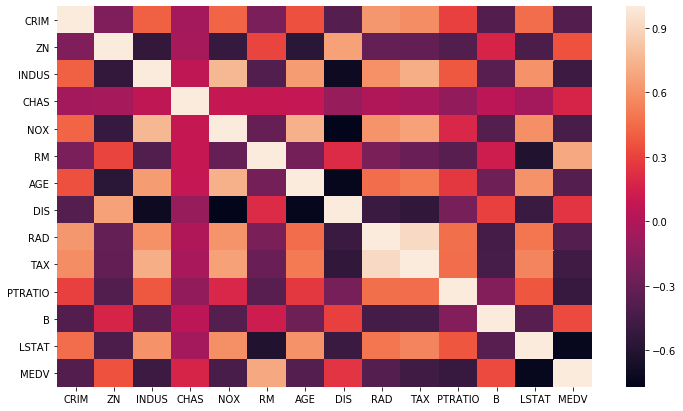

In [272]:
plt.figure(figsize=(12,7)) # use pyplot to change the default size of the heatmap
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns) # seaborn heatmap

Looking at the correlation table and correlation plot, it looks like the following as examples (there are more):
1. RAD and TAX are strongly positively correlated so as accessibility to radial highways increases, so does full value property tax.  
2. INDUS and NOX are strongly positively correlated. It looks like nitric oxides concentration is higher where non retail businesses are present, i.e. industrial.
3. MEDV and RM have a strong positive correlation. This makes sense, more rooms equals higher house value.
4. MEDV and LSTAT are strongly negatively correlated. The more % lower status of the population, the less the value of the property.
5. CRIM (per capita crime rate by town)has a strong relationship with accessibility to highways RAD so access to highways is connected to a higer crime rate.
6. Nitric Oxide(NOX) and Pupil Teacher Ratio (PTRATIO) negatively affect house prices. 

 

So it might be a good idea to take a look at these initially as opposed to trying to analyse everything at once.

 Exploring the distributions:

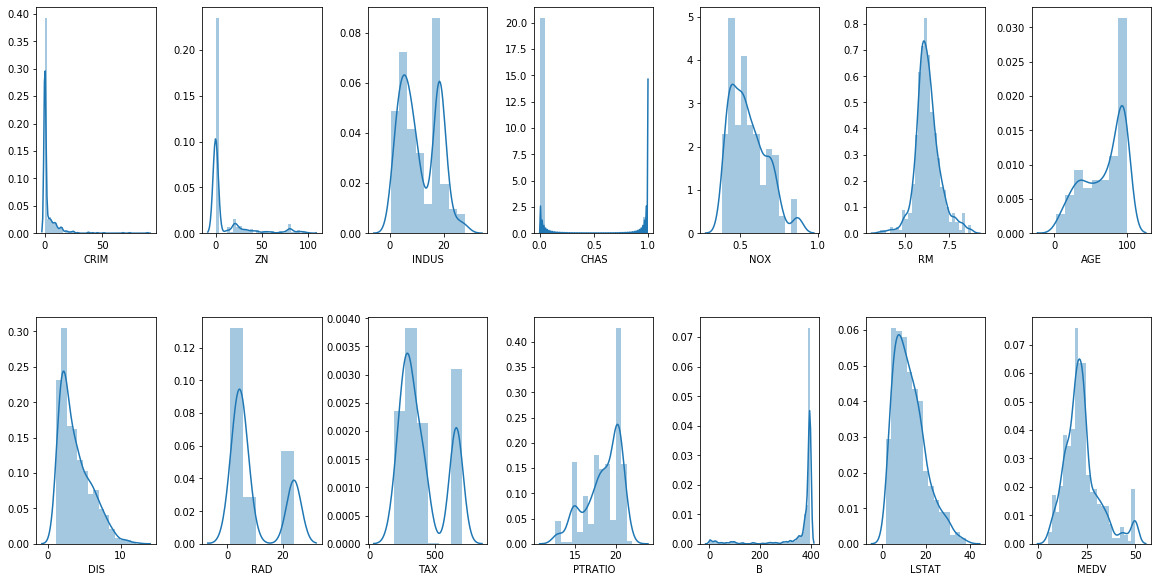

In [273]:
fig, axs = plt.subplots(ncols=7, nrows=2, figsize=(16, 8))
index = 0
axs = axs.flatten()
for i,j in bos.items():
    sns.distplot(j, ax=axs[index])
    index += 1
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)



In [274]:
# can use this method to plot selected histograms to make life easier to view only what's of interest

#split1 = ['AGE','B','CHAS','CRIM','DIS','INDUS','LSTAT'] # just splitting them to view it easier
#split2 = ['MEDV','RAD','RM','TAX','ZN','PTRATIO','NOX']
#hist = bos[split1].hist(bins=20,figsize=(18,3), layout=(1,7))
#hist2 = bos[split2].hist(bins=20,figsize=(18,3), layout=(1,7))
#plt.hist # plot it

MEDV and RM look like a normal distribution. AGE and B are skewed to the right. CHAS is attribute/categorical(either a yes or no/1 or 0 etc.). There does seem to be some noise or outliers in some of the attributes.

In summary, the attributes are not all the same distribution.

The following code as per the seaborn website provides a pair plot, however it's too busy. It's impossible to read and follow. 
It might be better to identify correlations or relationships of meaning as above, then split the dataset and just visualise those attributes that you are intersted in.

In [275]:
#sns.pairplot(bos), 
#plot_kws={'alpha': 0.9},
#diag_kws={'bins': 30}

insert text here explaining what features are important .....

In [276]:
select_attrs = ['RAD','TAX','MEDV','RM','LSTAT'] # just give me these columns/ attributes
#bos[select_attrs].head() # just checking it works. I don't actually want to see it again

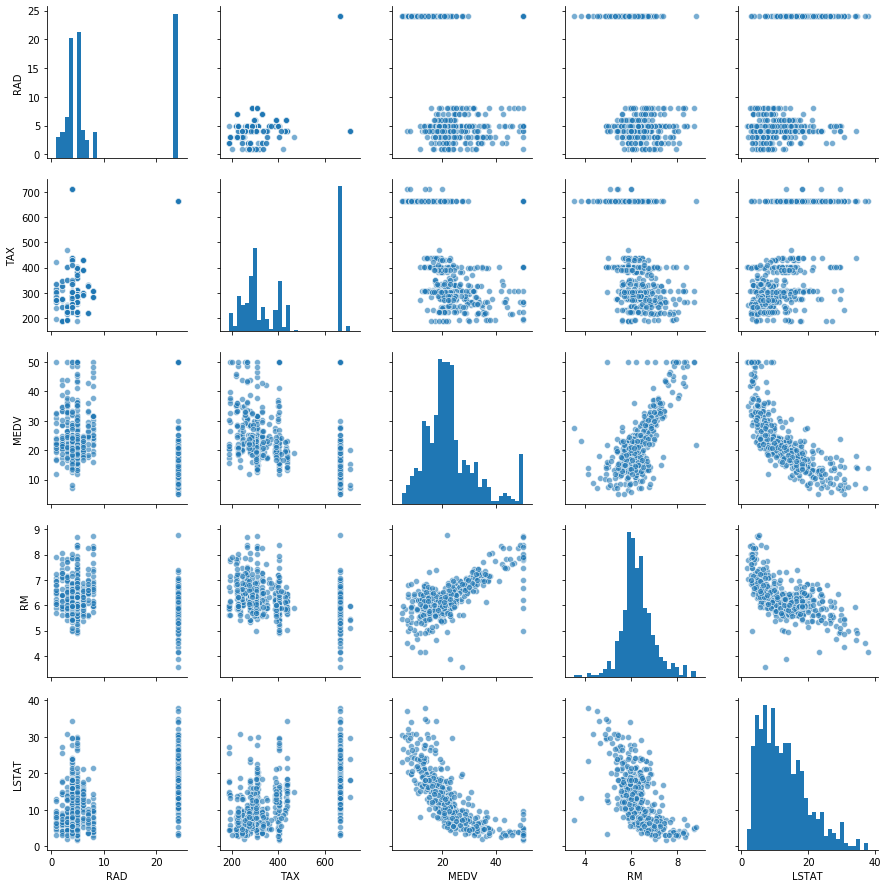

In [277]:
# create a pairplot - all variables paired with all other variables. This is a sample of attributes as defined above. 
sns.pairplot(bos[select_attrs],plot_kws={'alpha':0.6},diag_kws={'bins':30})


From the pairplot above, it appears that the data is not normalised and possibly needs to be transformed to determine relationships between features or when making predictions. It's definitely not all on the same scale.  

Outlier Detection:

Box plots can be easily displayed to understand distributions using the following code. Here is a quick example:

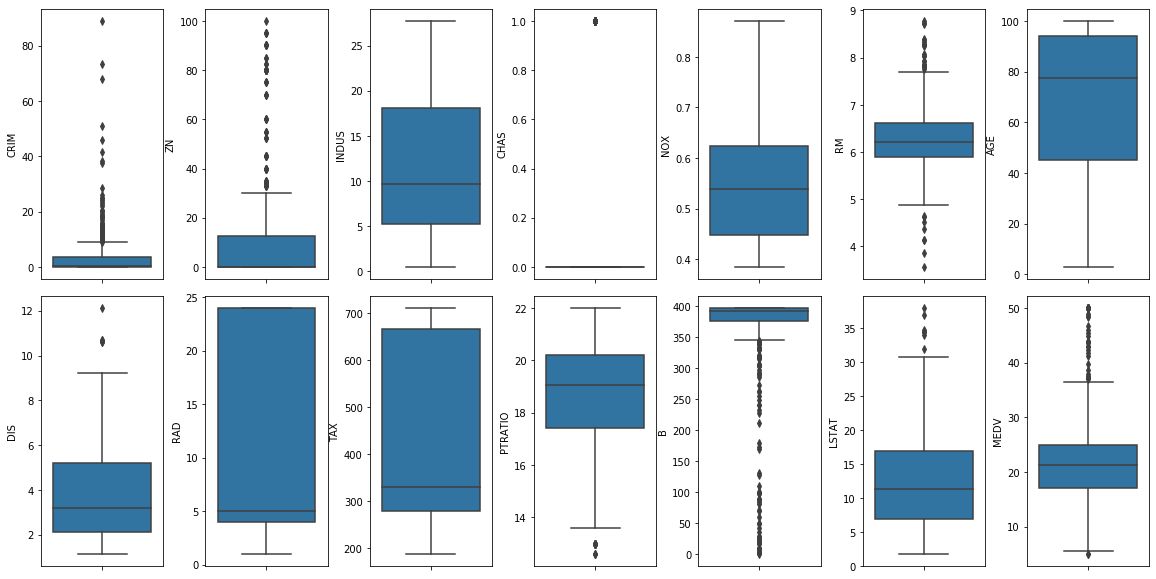

In [278]:
# a quick boxplot of selected attributes using Pandas.
fig, axis = plt.subplots(ncols=7, nrows=2, figsize=(16, 8))
index = 0
axis = axis.flatten()
for i,j in bos.items():
    sns.boxplot(y=i, data=bos, ax=axis[index])
    index += 1
plt.tight_layout(pad=0.5, w_pad=0.2, h_pad=1.0)

From the boxplots above, it can be seen that quite a few of the attributes have potential outliers or at least are being detected as outliers. This is contentious though. No information is actually known about the observations to make an accurate decision on this. Also, the spread of the some of the attributes is quite large.   

## Section 3 - Inferential Statistics

Is there a significant difference in median house prices between houses that are along the Charles River and those that are not ?

Just to get an idea of the breakdown, a quick graph shows the count of how many entries of the 506 have a 'CHAS' value of 0 and how many have a 'CHAS' value of 1.


Note: 
1. CHAS = 0 (does not bound river)
2. CHAS = 1 (does bound river)

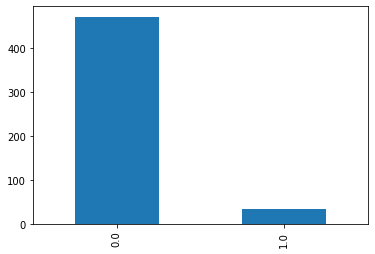

In [279]:
bos['CHAS'].value_counts().plot(kind ='bar')
plt.show()

The majority of entries have a CHAS value of 0 or do not tract the Charles River. The next blocks of code will atempt to sort the data for analysis and then perform a t-test to determine if there is a significant difference in median house prices.

In [280]:
# code adapted from pandas 'DataFrame.where' conditions examples on the pandas website.
# switched to bos1 name as annoying 'working with copy df' error below but ok to ignore 
import pandas as pd

bos1 = pd.DataFrame(boston.data)
bos1.columns = boston.feature_names # add attributes to column names 
bos1['MEDV'] = boston.target # add the median value (target value as described above)

#create a dataframe with just CHAS and MEDV
bos1 = bos1[["CHAS", "MEDV"]]

#filter the data, here i want only the entries where CHAS = 0 
bos1.sort_values("CHAS", inplace = True)
filter = bos1["CHAS"] < 1.0
bos1.where(filter,inplace = True)

#np.mean(bos1)

In [281]:
##give me the breakdown/count of how many entries have a CHAS = 0
bos1.count()

CHAS    471
MEDV    471
dtype: int64

In [282]:
bos2 = pd.DataFrame(boston.data)
bos2.columns = boston.feature_names # add attributes to column names 
bos2['MEDV'] = boston.target # add the median value (target value as described above)

bos2 = bos2[["CHAS", "MEDV"]]

#filter the data, here i want only the entries where CHAS = 1
bos2.sort_values("CHAS", inplace = True)
filter = bos2["CHAS"] > 0.0
bos2.where(filter,inplace = True)

#np.mean(bos2)

In [283]:
#give me the breakdown/count of how many entries have a CHAS = 1
bos2.count()

CHAS    35
MEDV    35
dtype: int64

In [284]:
#prepping this to perform a t-test. I tried merging but it was a disaster.
bos_N = bos1[["MEDV"]]
bos_Y = bos2[["MEDV"]]

In [285]:
print('CHAS=0', np.mean(bos_N))
print('CHAS=1', np.mean(bos_Y))

CHAS=0 MEDV    22.094
dtype: float64
CHAS=1 MEDV    28.44
dtype: float64


From the breakdown, it can be seen that there are 471 entries that do not tract the Charles River and there are 35 that do. A quick visual of the means can also be seen above. They are indeed different. How significant is that difference? The next block of code will attempt to answer that using a t-test in scipy. 

In [286]:
import scipy as sp
from scipy import stats

#perform a t-test
print("T-TEST RESULTS")
sp.stats.ttest_ind(bos_N.dropna()['MEDV'], bos_Y.dropna()['MEDV'])

# Was getting NaN on initial attempts due to uneven entries. 
# credit to www.stackoverflow.com/questions/37022888/t-test-in-scipy-with-nan-values
# see my checkpoints for how i arrived here(getting a result as opposed to NaN).

T-TEST RESULTS


Ttest_indResult(statistic=-3.9964374660905104, pvalue=7.390623170519865e-05)

Assuming the following:

1. H0: μD = 0 (there is no difference between the two means) (Null Hypothesis)
2. H1: μD ≠ 0 (there is a difference between the two means)  (Alternative - Fail to accept H0)

P > alpha  =  Accept Null

P < alpha  =  Reject Null

where alpha = 0.05

The calculated t statistic is 3.9964 and the p value is 0.000073906. 
The p-value is less that 0.05 and so it could be reasonable to reject the Null and state that there is a significant difference between means. This is supported by a large t statistic (where 0 = no difference in means).

C:\Users\aroche2\AppData\Local\Continuum\anaconda4\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\aroche2\AppData\Local\Continuum\anaconda4\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


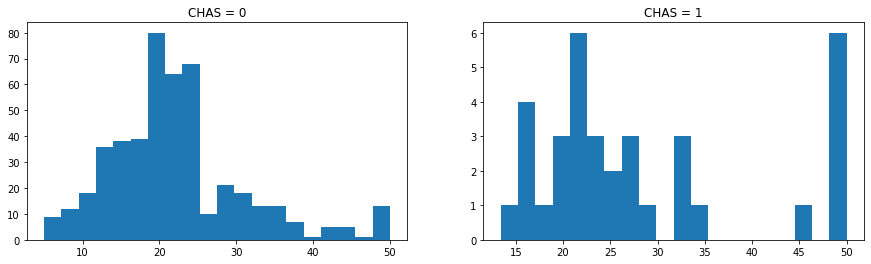

In [287]:
#plt.hist(bos1["MEDV"], bins = 10)
#plt.show()
fig, axes = plt.subplots (1,2, figsize=(15,4))
axes[0].hist(bos1["MEDV"], bins = 20)
axes[0].set_title ("CHAS = 0")
axes[1].hist(bos2["MEDV"], bins = 20)
axes[1].set_title("CHAS = 1")

plt.hist
plt.show()


A quick check of the distributions show that they are different. The means are different and we also know from above that the sample sizes are un-equal. A better test might be Welch's t-test.

In [288]:
print('Welchs T-TEST RESULT')
sp.stats.ttest_ind(bos_N.dropna()['MEDV'], bos_Y.dropna()['MEDV'], equal_var = False) #note equal_var = False - perform Welchs t-test

Welchs T-TEST RESULT


Ttest_indResult(statistic=-3.1132913127948383, pvalue=0.00356717009813751)

The results show a significant difference, with the p-value less than 0.05. So again we reject the Null Hypothesis and state that there is a significant difference betwen means. 
It is fair to assume that houses situated along the Charles River are more expensive / there are more expensive houses along the river than those that are not along the river.

This does not suggest that the river is the sole reason for the price difference however. It could be that the river does not go through/pass through every district. It might also be affected by pupil/teacher ratio or even nitric oxides concentration.  

## Section 4 - Prediction

In [289]:
#import libraries and modules
import keras as kr
import pandas as pd 
import numpy as np 
import sklearn.preprocessing as pre
import sklearn.model_selection as mod

from sklearn.datasets import load_boston
boston = load_boston()

In [290]:
#quck check. I want the first four rows to create arrays later 
bos.head(4)

CRIM    ZN  INDUS  CHAS    NOX     RM   AGE    DIS  RAD    TAX  PTRATIO  \
0  0.006  18.0   2.31   0.0  0.538  6.575  65.2  4.090  1.0  296.0     15.3   
1  0.027   0.0   7.07   0.0  0.469  6.421  78.9  4.967  2.0  242.0     17.8   
2  0.027   0.0   7.07   0.0  0.469  7.185  61.1  4.967  2.0  242.0     17.8   
3  0.032   0.0   2.18   0.0  0.458  6.998  45.8  6.062  3.0  222.0     18.7   

        B  LSTAT  MEDV  
0  396.90   4.98  24.0  
1  396.90   9.14  21.6  
2  392.83   4.03  34.7  
3  394.63   2.94  33.4

In [291]:
#prepping data, drop MEDV from the inputs 
x = bos.drop(columns=["MEDV"])
y = bos[["MEDV"]] # make MEDV the target

In [292]:
# i don't know how to use this  - need to figure it out....results look off when using scaled input data
#min_max_scaler = pre.MinMaxScaler()
#x_scale = min_max_scaler.fit_transform(x)
#y_scale = min_max_scaler.fit_transform(y) # Note to self: do i need to scale the target if there is only one target value

In [293]:
model = kr.Sequential()

In [294]:
# build the layers
model.add(kr.layers.Dense(13, activation ='relu', input_shape=(13,)))
model.add(kr.layers.Dense(13, activation = 'relu'))
model.add(kr.layers.Dense(1)) # ends with no activation or constraint - can predict a single continuous value.

In [295]:
#print a summary of the model
model.summary()

Model: "sequential_67"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_199 (Dense)            (None, 13)                182       
_________________________________________________________________
dense_200 (Dense)            (None, 13)                182       
_________________________________________________________________
dense_201 (Dense)            (None, 1)                 14        
Total params: 378
Trainable params: 378
Non-trainable params: 0
_________________________________________________________________


In [296]:
model.compile(optimizer = 'rmsprop', loss = 'mean_squared_error', metrics = ['mean_absolute_error'])

In [297]:
model.fit(x,y, epochs=1000) 

Epoch 1/1000
506/506 [==============================] - 0s 700us/step - loss: 22686.0993 - mean_absolute_error: 144.8033
Epoch 2/1000
506/506 [==============================] - 0s 57us/step - loss: 8191.7306 - mean_absolute_error: 88.4398
Epoch 3/1000
506/506 [==============================] - 0s 76us/step - loss: 2722.0047 - mean_absolute_error: 49.4567
Epoch 4/1000
506/506 [==============================] - 0s 67us/step - loss: 927.8616 - mean_absolute_error: 26.6149
Epoch 5/1000
506/506 [==============================] - 0s 65us/step - loss: 376.0710 - mean_absolute_error: 16.6825
Epoch 6/1000
506/506 [==============================] - ETA: 0s - loss: 183.2114 - mean_absolute_error: 10.40 - 0s 71us/step - loss: 179.2298 - mean_absolute_error: 10.4860
Epoch 7/1000
506/506 [==============================] - 0s 79us/step - loss: 114.5117 - mean_absolute_error: 8.0704
Epoch 8/1000
506/506 [==============================] - 0s 65us/step - loss: 95.3832 - mean_absolute_error: 7.3732
Epoch

506/506 [==============================] - 0s 52us/step - loss: 41.3088 - mean_absolute_error: 4.6883
Epoch 69/1000
506/506 [==============================] - 0s 48us/step - loss: 39.8797 - mean_absolute_error: 4.5637
Epoch 70/1000
506/506 [==============================] - 0s 46us/step - loss: 40.0817 - mean_absolute_error: 4.6097
Epoch 71/1000
506/506 [==============================] - 0s 42us/step - loss: 42.5392 - mean_absolute_error: 4.7634
Epoch 72/1000
506/506 [==============================] - 0s 46us/step - loss: 39.9784 - mean_absolute_error: 4.5637
Epoch 73/1000
506/506 [==============================] - 0s 46us/step - loss: 40.6073 - mean_absolute_error: 4.7201
Epoch 74/1000
506/506 [==============================] - 0s 44us/step - loss: 40.0143 - mean_absolute_error: 4.6308
Epoch 75/1000
506/506 [==============================] - 0s 46us/step - loss: 39.1699 - mean_absolute_error: 4.5443
Epoch 76/1000
506/506 [==============================] - 0s 55us/step - loss: 35.3533 

506/506 [==============================] - 0s 50us/step - loss: 34.7544 - mean_absolute_error: 4.2580
Epoch 136/1000
506/506 [==============================] - 0s 48us/step - loss: 35.0222 - mean_absolute_error: 4.4288
Epoch 137/1000
506/506 [==============================] - 0s 48us/step - loss: 32.3237 - mean_absolute_error: 4.2153
Epoch 138/1000
506/506 [==============================] - 0s 46us/step - loss: 35.3840 - mean_absolute_error: 4.4875
Epoch 139/1000
506/506 [==============================] - 0s 50us/step - loss: 33.8968 - mean_absolute_error: 4.3347
Epoch 140/1000
506/506 [==============================] - 0s 50us/step - loss: 33.6595 - mean_absolute_error: 4.3964
Epoch 141/1000
506/506 [==============================] - 0s 42us/step - loss: 35.7020 - mean_absolute_error: 4.4771
Epoch 142/1000
506/506 [==============================] - 0s 48us/step - loss: 35.8336 - mean_absolute_error: 4.4426
Epoch 143/1000
506/506 [==============================] - 0s 48us/step - loss: 

506/506 [==============================] - 0s 46us/step - loss: 31.7015 - mean_absolute_error: 4.2456
Epoch 204/1000
506/506 [==============================] - 0s 48us/step - loss: 35.4896 - mean_absolute_error: 4.4190
Epoch 205/1000
506/506 [==============================] - 0s 53us/step - loss: 30.7957 - mean_absolute_error: 4.0522
Epoch 206/1000
506/506 [==============================] - 0s 50us/step - loss: 32.0326 - mean_absolute_error: 4.1046
Epoch 207/1000
506/506 [==============================] - 0s 46us/step - loss: 33.4076 - mean_absolute_error: 4.3165
Epoch 208/1000
506/506 [==============================] - 0s 44us/step - loss: 32.8388 - mean_absolute_error: 4.2496
Epoch 209/1000
506/506 [==============================] - 0s 46us/step - loss: 33.6972 - mean_absolute_error: 4.3246
Epoch 210/1000
506/506 [==============================] - 0s 42us/step - loss: 29.7784 - mean_absolute_error: 4.0439
Epoch 211/1000
506/506 [==============================] - 0s 46us/step - loss: 

506/506 [==============================] - 0s 48us/step - loss: 29.4352 - mean_absolute_error: 3.9845
Epoch 272/1000
506/506 [==============================] - 0s 46us/step - loss: 30.9947 - mean_absolute_error: 4.1826
Epoch 273/1000
506/506 [==============================] - 0s 46us/step - loss: 31.7711 - mean_absolute_error: 4.2257
Epoch 274/1000
506/506 [==============================] - 0s 46us/step - loss: 27.9711 - mean_absolute_error: 3.9611
Epoch 275/1000
506/506 [==============================] - 0s 53us/step - loss: 29.9733 - mean_absolute_error: 4.0095
Epoch 276/1000
506/506 [==============================] - 0s 49us/step - loss: 30.7475 - mean_absolute_error: 4.0716
Epoch 277/1000
506/506 [==============================] - 0s 46us/step - loss: 30.5365 - mean_absolute_error: 4.0738
Epoch 278/1000
506/506 [==============================] - ETA: 0s - loss: 40.0783 - mean_absolute_error: 5.49 - 0s 46us/step - loss: 33.1106 - mean_absolute_error: 4.1401
Epoch 279/1000
506/506 [=

506/506 [==============================] - 0s 49us/step - loss: 32.0026 - mean_absolute_error: 4.0509
Epoch 339/1000
506/506 [==============================] - 0s 45us/step - loss: 28.9453 - mean_absolute_error: 3.9410
Epoch 340/1000
506/506 [==============================] - 0s 46us/step - loss: 29.0369 - mean_absolute_error: 3.9443
Epoch 341/1000
506/506 [==============================] - 0s 44us/step - loss: 27.1212 - mean_absolute_error: 3.8642
Epoch 342/1000
506/506 [==============================] - ETA: 0s - loss: 31.6757 - mean_absolute_error: 3.92 - 0s 44us/step - loss: 31.6005 - mean_absolute_error: 4.2536
Epoch 343/1000
506/506 [==============================] - 0s 44us/step - loss: 29.2619 - mean_absolute_error: 3.9868
Epoch 344/1000
506/506 [==============================] - 0s 51us/step - loss: 29.3501 - mean_absolute_error: 4.0242
Epoch 345/1000
506/506 [==============================] - 0s 46us/step - loss: 30.1012 - mean_absolute_error: 4.1320
Epoch 346/1000
506/506 [=

506/506 [==============================] - 0s 54us/step - loss: 28.1159 - mean_absolute_error: 3.9337
Epoch 406/1000
506/506 [==============================] - 0s 48us/step - loss: 28.2025 - mean_absolute_error: 3.8862
Epoch 407/1000
506/506 [==============================] - 0s 47us/step - loss: 28.9514 - mean_absolute_error: 3.9739
Epoch 408/1000
506/506 [==============================] - 0s 50us/step - loss: 27.0891 - mean_absolute_error: 3.8401
Epoch 409/1000
506/506 [==============================] - 0s 48us/step - loss: 27.8067 - mean_absolute_error: 3.8813
Epoch 410/1000
506/506 [==============================] - 0s 47us/step - loss: 31.3900 - mean_absolute_error: 4.0770
Epoch 411/1000
506/506 [==============================] - 0s 48us/step - loss: 27.9305 - mean_absolute_error: 3.8412
Epoch 412/1000
506/506 [==============================] - 0s 52us/step - loss: 27.7054 - mean_absolute_error: 3.8274
Epoch 413/1000
506/506 [==============================] - 0s 48us/step - loss: 

506/506 [==============================] - 0s 48us/step - loss: 25.2559 - mean_absolute_error: 3.6802
Epoch 475/1000
506/506 [==============================] - 0s 48us/step - loss: 28.1037 - mean_absolute_error: 3.9341
Epoch 476/1000
506/506 [==============================] - ETA: 0s - loss: 19.6280 - mean_absolute_error: 2.97 - 0s 50us/step - loss: 27.3171 - mean_absolute_error: 3.8144
Epoch 477/1000
506/506 [==============================] - 0s 49us/step - loss: 26.7982 - mean_absolute_error: 3.7623
Epoch 478/1000
506/506 [==============================] - 0s 47us/step - loss: 27.2702 - mean_absolute_error: 3.9032
Epoch 479/1000
506/506 [==============================] - 0s 44us/step - loss: 28.7251 - mean_absolute_error: 3.8475
Epoch 480/1000
506/506 [==============================] - 0s 48us/step - loss: 27.5524 - mean_absolute_error: 3.8495
Epoch 481/1000
506/506 [==============================] - 0s 45us/step - loss: 26.5241 - mean_absolute_error: 3.7629
Epoch 482/1000
506/506 [=

506/506 [==============================] - 0s 50us/step - loss: 26.4285 - mean_absolute_error: 3.7219
Epoch 543/1000
506/506 [==============================] - 0s 48us/step - loss: 24.9361 - mean_absolute_error: 3.6994
Epoch 544/1000
506/506 [==============================] - 0s 49us/step - loss: 26.3799 - mean_absolute_error: 3.8106
Epoch 545/1000
506/506 [==============================] - 0s 50us/step - loss: 23.8879 - mean_absolute_error: 3.6242
Epoch 546/1000
506/506 [==============================] - 0s 48us/step - loss: 29.9591 - mean_absolute_error: 4.0144
Epoch 547/1000
506/506 [==============================] - 0s 49us/step - loss: 25.6489 - mean_absolute_error: 3.6819
Epoch 548/1000
506/506 [==============================] - 0s 47us/step - loss: 24.5322 - mean_absolute_error: 3.6412
Epoch 549/1000
506/506 [==============================] - 0s 50us/step - loss: 29.0665 - mean_absolute_error: 3.9697
Epoch 550/1000
506/506 [==============================] - 0s 52us/step - loss: 

506/506 [==============================] - 0s 46us/step - loss: 26.1688 - mean_absolute_error: 3.7867
Epoch 611/1000
506/506 [==============================] - 0s 46us/step - loss: 25.8152 - mean_absolute_error: 3.6708
Epoch 612/1000
506/506 [==============================] - 0s 44us/step - loss: 27.4790 - mean_absolute_error: 3.8704
Epoch 613/1000
506/506 [==============================] - 0s 46us/step - loss: 28.5741 - mean_absolute_error: 3.8462
Epoch 614/1000
506/506 [==============================] - 0s 52us/step - loss: 23.8572 - mean_absolute_error: 3.5400
Epoch 615/1000
506/506 [==============================] - 0s 50us/step - loss: 27.8868 - mean_absolute_error: 3.9038
Epoch 616/1000
506/506 [==============================] - 0s 55us/step - loss: 23.8516 - mean_absolute_error: 3.6225
Epoch 617/1000
506/506 [==============================] - 0s 53us/step - loss: 25.3100 - mean_absolute_error: 3.6725
Epoch 618/1000
506/506 [==============================] - 0s 50us/step - loss: 

506/506 [==============================] - 0s 46us/step - loss: 25.3057 - mean_absolute_error: 3.6249
Epoch 679/1000
506/506 [==============================] - 0s 46us/step - loss: 24.9205 - mean_absolute_error: 3.5963
Epoch 680/1000
506/506 [==============================] - 0s 41us/step - loss: 25.6180 - mean_absolute_error: 3.6284
Epoch 681/1000
506/506 [==============================] - 0s 46us/step - loss: 26.0263 - mean_absolute_error: 3.7870
Epoch 682/1000
506/506 [==============================] - 0s 44us/step - loss: 25.6295 - mean_absolute_error: 3.7128
Epoch 683/1000
506/506 [==============================] - 0s 43us/step - loss: 24.8901 - mean_absolute_error: 3.6694
Epoch 684/1000
506/506 [==============================] - 0s 50us/step - loss: 25.3280 - mean_absolute_error: 3.7029
Epoch 685/1000
506/506 [==============================] - 0s 53us/step - loss: 24.9243 - mean_absolute_error: 3.7143
Epoch 686/1000
506/506 [==============================] - 0s 65us/step - loss: 

506/506 [==============================] - 0s 59us/step - loss: 23.0788 - mean_absolute_error: 3.5581
Epoch 748/1000
506/506 [==============================] - 0s 60us/step - loss: 24.3909 - mean_absolute_error: 3.7652
Epoch 749/1000
506/506 [==============================] - 0s 55us/step - loss: 23.9712 - mean_absolute_error: 3.5036
Epoch 750/1000
506/506 [==============================] - ETA: 0s - loss: 26.7727 - mean_absolute_error: 4.31 - 0s 50us/step - loss: 26.8164 - mean_absolute_error: 3.7800
Epoch 751/1000
506/506 [==============================] - 0s 63us/step - loss: 25.2479 - mean_absolute_error: 3.6963
Epoch 752/1000
506/506 [==============================] - 0s 44us/step - loss: 23.3291 - mean_absolute_error: 3.5277
Epoch 753/1000
506/506 [==============================] - 0s 46us/step - loss: 25.1106 - mean_absolute_error: 3.7219
Epoch 754/1000
506/506 [==============================] - 0s 46us/step - loss: 24.9215 - mean_absolute_error: 3.6872
Epoch 755/1000
506/506 [=

506/506 [==============================] - 0s 46us/step - loss: 23.7453 - mean_absolute_error: 3.5492
Epoch 817/1000
506/506 [==============================] - 0s 43us/step - loss: 24.0983 - mean_absolute_error: 3.6434
Epoch 818/1000
506/506 [==============================] - 0s 44us/step - loss: 24.0109 - mean_absolute_error: 3.5349
Epoch 819/1000
506/506 [==============================] - 0s 44us/step - loss: 22.5761 - mean_absolute_error: 3.4496
Epoch 820/1000
506/506 [==============================] - 0s 44us/step - loss: 25.2059 - mean_absolute_error: 3.6769
Epoch 821/1000
506/506 [==============================] - 0s 45us/step - loss: 21.8466 - mean_absolute_error: 3.4428
Epoch 822/1000
506/506 [==============================] - 0s 44us/step - loss: 24.4949 - mean_absolute_error: 3.5905
Epoch 823/1000
506/506 [==============================] - 0s 46us/step - loss: 23.7476 - mean_absolute_error: 3.6223
Epoch 824/1000
506/506 [==============================] - 0s 54us/step - loss: 

506/506 [==============================] - 0s 48us/step - loss: 22.9367 - mean_absolute_error: 3.4910
Epoch 884/1000
506/506 [==============================] - 0s 51us/step - loss: 22.6202 - mean_absolute_error: 3.4186
Epoch 885/1000
506/506 [==============================] - 0s 48us/step - loss: 23.7227 - mean_absolute_error: 3.5825
Epoch 886/1000
506/506 [==============================] - 0s 46us/step - loss: 20.5734 - mean_absolute_error: 3.3144
Epoch 887/1000
506/506 [==============================] - 0s 52us/step - loss: 23.4950 - mean_absolute_error: 3.5012
Epoch 888/1000
506/506 [==============================] - 0s 49us/step - loss: 23.2856 - mean_absolute_error: 3.5536
Epoch 889/1000
506/506 [==============================] - ETA: 0s - loss: 15.7792 - mean_absolute_error: 2.78 - 0s 52us/step - loss: 24.4567 - mean_absolute_error: 3.6428
Epoch 890/1000
506/506 [==============================] - 0s 42us/step - loss: 21.0946 - mean_absolute_error: 3.3447
Epoch 891/1000
506/506 [=

506/506 [==============================] - 0s 48us/step - loss: 20.9078 - mean_absolute_error: 3.3481
Epoch 953/1000
506/506 [==============================] - 0s 47us/step - loss: 21.0729 - mean_absolute_error: 3.4388
Epoch 954/1000
506/506 [==============================] - 0s 46us/step - loss: 25.3692 - mean_absolute_error: 3.6393
Epoch 955/1000
506/506 [==============================] - 0s 46us/step - loss: 19.8582 - mean_absolute_error: 3.2905
Epoch 956/1000
506/506 [==============================] - 0s 49us/step - loss: 22.5245 - mean_absolute_error: 3.5509
Epoch 957/1000
506/506 [==============================] - 0s 48us/step - loss: 23.1148 - mean_absolute_error: 3.5588
Epoch 958/1000
506/506 [==============================] - 0s 50us/step - loss: 20.3558 - mean_absolute_error: 3.2638
Epoch 959/1000
506/506 [==============================] - 0s 52us/step - loss: 21.7039 - mean_absolute_error: 3.4056
Epoch 960/1000
506/506 [==============================] - 0s 49us/step - loss: 

In [298]:
# The numpy arrays below are the values from the dataset's 13 features, first 4 rows, as above. 
# I know the target result (MEDV) in this case so i'm just testing to see how far away the model is.

test = np.array([0.006, 18.0, 2.31, 0.0, 0.538, 6.575, 65.2, 4.090, 1.0, 296.0, 15.3, 396.90, 4.98 ])
test2 = np.array([0.027, 0.0, 7.07, 0.0, 0.469, 6.421, 78.9, 4.967, 2.0, 242.0, 17.8, 396.90, 9.14 ])
test3 = np.array([0.027, 0.0, 7.07, 0.0, 0.469, 7.185, 61.1, 4.967, 2.0, 242.0, 17.8, 392.83, 4.03 ])
test4 = np.array([0.032, 0.0, 2.18, 0.0, 0.458, 6.998, 45.8, 6.062, 3.0, 222.0, 18.7, 394.63, 2.94 ])

print("The actual values are", y.head(4))
print() # no arguments, just want a space 

print("The prediction results are:")
print(model.predict(test.reshape(1,13), batch_size=1))
print(model.predict(test2.reshape(1,13), batch_size=1))
print(model.predict(test3.reshape(1,13), batch_size=1))
print(model.predict(test4.reshape(1,13), batch_size=1))



The actual values are    MEDV
0  24.0
1  21.6
2  34.7
3  33.4

The prediction results are:
[[32.168842]]
[[25.418756]]
[[30.736944]]
[[31.792648]]


### Model 2  - Testing with Specific Features/Attributes 

From the descriptive statistics and dataset exploration it was found that specific features had relationships to one another. The next section will atempt to build a model using a subset of the dataset and explore if a better reesult can be obtained.
For example:
1. LSTAT had a strong correlation(negative)with MEDV but was not linear
2. RM had a strong positive correlation with MEDV and it appeared to be a liner relationship. This could potentially be a good indicator.
3. NOX and PTRATIO negatively affect MEDV.

In [299]:
import keras as kr
import pandas as pd 
import numpy as np 
import sklearn.preprocessing as pre
import sklearn.model_selection as mod

from sklearn.datasets import load_boston
boston = load_boston()

In [300]:
#x2 = bos.drop(columns=["MEDV","CRIM","ZN","AGE","CHAS","B","RAD","TAX","INDUS"])
x2 = bos[["LSTAT","RM","PTRATIO"]]
y2 = bos[["MEDV"]]

In [301]:
model = kr.Sequential()

In [302]:
model.add(kr.layers.Dense(64, activation ='relu', input_shape=(3,)))
model.add(kr.layers.Dense(64, activation = 'relu'))
model.add(kr.layers.Dense(1)) # ends with no activation or constraint - can predict a single continuous value.

In [303]:
model.compile(optimizer = 'adam', loss = 'mean_squared_error', metrics = ['mean_absolute_error'])

In [304]:
model.fit(x2,y2, epochs=500) 

Epoch 1/500
506/506 [==============================] - 0s 795us/step - loss: 555.7770 - mean_absolute_error: 21.5699
Epoch 2/500
506/506 [==============================] - 0s 76us/step - loss: 225.9865 - mean_absolute_error: 11.7063
Epoch 3/500
506/506 [==============================] - 0s 79us/step - loss: 140.7152 - mean_absolute_error: 8.7876
Epoch 4/500
506/506 [==============================] - 0s 75us/step - loss: 127.3499 - mean_absolute_error: 8.4509
Epoch 5/500
506/506 [==============================] - 0s 57us/step - loss: 108.2555 - mean_absolute_error: 7.5062
Epoch 6/500
506/506 [==============================] - 0s 54us/step - loss: 92.4847 - mean_absolute_error: 6.8040
Epoch 7/500
506/506 [==============================] - ETA: 0s - loss: 106.7677 - mean_absolute_error: 7.580 - 0s 65us/step - loss: 77.1277 - mean_absolute_error: 6.2560
Epoch 8/500
506/506 [==============================] - 0s 55us/step - loss: 65.2415 - mean_absolute_error: 5.8151
Epoch 9/500
506/506 [===

506/506 [==============================] - 0s 54us/step - loss: 19.4005 - mean_absolute_error: 3.0489
Epoch 70/500
506/506 [==============================] - 0s 49us/step - loss: 19.6533 - mean_absolute_error: 3.0416
Epoch 71/500
506/506 [==============================] - 0s 47us/step - loss: 19.2407 - mean_absolute_error: 3.0050
Epoch 72/500
506/506 [==============================] - 0s 48us/step - loss: 19.0849 - mean_absolute_error: 3.0047
Epoch 73/500
506/506 [==============================] - 0s 48us/step - loss: 18.8908 - mean_absolute_error: 2.9895
Epoch 74/500
506/506 [==============================] - 0s 56us/step - loss: 19.3904 - mean_absolute_error: 3.0192
Epoch 75/500
506/506 [==============================] - 0s 55us/step - loss: 19.4097 - mean_absolute_error: 3.0577
Epoch 76/500
506/506 [==============================] - 0s 52us/step - loss: 19.2003 - mean_absolute_error: 3.0212
Epoch 77/500
506/506 [==============================] - 0s 45us/step - loss: 20.0925 - mean_a

506/506 [==============================] - 0s 48us/step - loss: 19.6591 - mean_absolute_error: 3.0982
Epoch 139/500
506/506 [==============================] - 0s 47us/step - loss: 18.9362 - mean_absolute_error: 3.0071
Epoch 140/500
506/506 [==============================] - ETA: 0s - loss: 10.3433 - mean_absolute_error: 2.63 - 0s 49us/step - loss: 18.7489 - mean_absolute_error: 2.9874
Epoch 141/500
506/506 [==============================] - 0s 48us/step - loss: 18.6546 - mean_absolute_error: 2.9764
Epoch 142/500
506/506 [==============================] - 0s 53us/step - loss: 18.3950 - mean_absolute_error: 2.9306
Epoch 143/500
506/506 [==============================] - 0s 48us/step - loss: 18.7788 - mean_absolute_error: 2.9778
Epoch 144/500
506/506 [==============================] - 0s 50us/step - loss: 18.4849 - mean_absolute_error: 2.9459
Epoch 145/500
506/506 [==============================] - 0s 48us/step - loss: 18.4878 - mean_absolute_error: 2.9577
Epoch 146/500
506/506 [=========

506/506 [==============================] - 0s 49us/step - loss: 18.4237 - mean_absolute_error: 2.9765
Epoch 206/500
506/506 [==============================] - 0s 50us/step - loss: 18.2025 - mean_absolute_error: 2.9584
Epoch 207/500
506/506 [==============================] - 0s 48us/step - loss: 18.7075 - mean_absolute_error: 3.0060
Epoch 208/500
506/506 [==============================] - 0s 52us/step - loss: 18.8107 - mean_absolute_error: 3.0022
Epoch 209/500
506/506 [==============================] - 0s 50us/step - loss: 18.5366 - mean_absolute_error: 2.9387
Epoch 210/500
506/506 [==============================] - 0s 49us/step - loss: 18.9146 - mean_absolute_error: 2.9806
Epoch 211/500
506/506 [==============================] - 0s 50us/step - loss: 18.9114 - mean_absolute_error: 3.0425
Epoch 212/500
506/506 [==============================] - 0s 49us/step - loss: 18.1838 - mean_absolute_error: 2.9419
Epoch 213/500
506/506 [==============================] - 0s 49us/step - loss: 18.2507 

506/506 [==============================] - 0s 50us/step - loss: 18.8092 - mean_absolute_error: 3.0617
Epoch 274/500
506/506 [==============================] - 0s 50us/step - loss: 18.0162 - mean_absolute_error: 2.9175
Epoch 275/500
506/506 [==============================] - 0s 50us/step - loss: 18.2787 - mean_absolute_error: 3.0095
Epoch 276/500
506/506 [==============================] - 0s 52us/step - loss: 18.0572 - mean_absolute_error: 2.9519
Epoch 277/500
506/506 [==============================] - 0s 51us/step - loss: 17.9223 - mean_absolute_error: 2.9111
Epoch 278/500
506/506 [==============================] - 0s 48us/step - loss: 19.0214 - mean_absolute_error: 3.0326
Epoch 279/500
506/506 [==============================] - 0s 48us/step - loss: 18.0811 - mean_absolute_error: 2.9248
Epoch 280/500
506/506 [==============================] - 0s 50us/step - loss: 19.0245 - mean_absolute_error: 3.0243
Epoch 281/500
506/506 [==============================] - 0s 48us/step - loss: 18.1626 

506/506 [==============================] - 0s 52us/step - loss: 18.4712 - mean_absolute_error: 3.0538
Epoch 344/500
506/506 [==============================] - 0s 48us/step - loss: 18.0700 - mean_absolute_error: 2.9216
Epoch 345/500
506/506 [==============================] - 0s 48us/step - loss: 18.3439 - mean_absolute_error: 2.9480
Epoch 346/500
506/506 [==============================] - 0s 52us/step - loss: 17.7755 - mean_absolute_error: 2.8890
Epoch 347/500
506/506 [==============================] - 0s 59us/step - loss: 18.2746 - mean_absolute_error: 2.9345
Epoch 348/500
506/506 [==============================] - 0s 51us/step - loss: 18.2244 - mean_absolute_error: 2.9624
Epoch 349/500
506/506 [==============================] - 0s 48us/step - loss: 18.3074 - mean_absolute_error: 2.9608
Epoch 350/500
506/506 [==============================] - 0s 52us/step - loss: 18.2847 - mean_absolute_error: 2.9132
Epoch 351/500
506/506 [==============================] - 0s 50us/step - loss: 17.9267 

506/506 [==============================] - 0s 52us/step - loss: 17.6420 - mean_absolute_error: 2.8795
Epoch 412/500
506/506 [==============================] - 0s 50us/step - loss: 17.7845 - mean_absolute_error: 2.9123
Epoch 413/500
506/506 [==============================] - 0s 51us/step - loss: 17.7175 - mean_absolute_error: 2.9089
Epoch 414/500
506/506 [==============================] - 0s 50us/step - loss: 17.6551 - mean_absolute_error: 2.8857
Epoch 415/500
506/506 [==============================] - 0s 48us/step - loss: 17.7806 - mean_absolute_error: 2.9131
Epoch 416/500
506/506 [==============================] - 0s 47us/step - loss: 17.6923 - mean_absolute_error: 2.9203
Epoch 417/500
506/506 [==============================] - 0s 54us/step - loss: 17.8949 - mean_absolute_error: 2.9342
Epoch 418/500
506/506 [==============================] - 0s 53us/step - loss: 18.1356 - mean_absolute_error: 2.9479
Epoch 419/500
506/506 [==============================] - ETA: 0s - loss: 9.2730 - mean

506/506 [==============================] - 0s 52us/step - loss: 17.4715 - mean_absolute_error: 2.8949
Epoch 480/500
506/506 [==============================] - 0s 50us/step - loss: 17.7222 - mean_absolute_error: 2.9027
Epoch 481/500
506/506 [==============================] - 0s 48us/step - loss: 17.3980 - mean_absolute_error: 2.8869
Epoch 482/500
506/506 [==============================] - 0s 50us/step - loss: 17.8597 - mean_absolute_error: 2.9474
Epoch 483/500
506/506 [==============================] - 0s 49us/step - loss: 18.2525 - mean_absolute_error: 2.9954
Epoch 484/500
506/506 [==============================] - 0s 50us/step - loss: 17.7089 - mean_absolute_error: 2.9119
Epoch 485/500
506/506 [==============================] - 0s 55us/step - loss: 17.5841 - mean_absolute_error: 2.8931
Epoch 486/500
506/506 [==============================] - 0s 52us/step - loss: 17.4488 - mean_absolute_error: 2.8757
Epoch 487/500
506/506 [==============================] - 0s 51us/step - loss: 17.6527 

In [305]:
x2.head(4)

LSTAT     RM  PTRATIO
0   4.98  6.575     15.3
1   9.14  6.421     17.8
2   4.03  7.185     17.8
3   2.94  6.998     18.7

In [306]:
test = np.array([4.98, 6.575, 15.3  ])
test2 = np.array([9.14, 6.421, 17.8  ])
test3 = np.array([4.03, 7.185, 17.8  ])
test4 = np.array([2.94, 6.998, 18.7   ])

#test = np.array([0.538, 6.575, 4.090, 15.3, 4.98  ])
#test2 = np.array([0.469, 6.421, 4.967, 17.8, 9.14  ])
#test3 = np.array([0.469, 7.185, 4.967, 17.8, 4.03  ])
#test4 = np.array([0.458, 6.998, 6.062, 18.7, 2.94  ])

print("The actual values are", y.head(4))
print() # no arguments, just want a space 
print("The prediction results are:")
print(model.predict(test.reshape(1,3), batch_size=1))
print(model.predict(test2.reshape(1,3), batch_size=1))
print(model.predict(test3.reshape(1,3), batch_size=1))
print(model.predict(test4.reshape(1,3), batch_size=1))

The actual values are    MEDV
0  24.0
1  21.6
2  34.7
3  33.4

The prediction results are:
[[29.001278]]
[[23.246996]]
[[34.453434]]
[[36.47262]]


The results show that the model is not accurate in it's current build. In the first prediction, it is off by approx 5000 (29-24). While that doesn't seem like much money, as a percentage of 50,000 it is 10% which is quite large (I haven't set any seed so these indicators are approximate for now). It much more accurate on all proceeding values though with entries 3 and 4 only off by order of hundreds as opposed to thousands.
Re-running the fit can improve results along with changing parameters such as epochs and activations but this isn't ideal.

### Splitting, Training and Testing 

The following approach will be taken to attempt to build a more accurate model:
1. Scale the input data. The data for attributes are on different scales as noted earlier in the exploratory section.
For example, Nox is parts per million, LSTAT is a percentage, CHAS is attribute/categorical etc.
2. The target (y) will not be scaled, as there is only one target.
3. Train the model. The dataset will be split into training and validation. The model will be trained on approx 80% data and then tested or validated on data it has not seen before.
4. Testing with parameters like epochs, neurons and activation errors will be conducted to improve the fit further. 

In [307]:
# Code adapted from www.keras.io and 'Deep Learning with Python' Pages 85-89 ISBN 9781617294433
from keras.datasets import boston_housing
import numpy as np

In [308]:
#boston_housing.load_data()

In [309]:
#Splitting into training and testing. The model will be built on training set and teted on test data
(train_data, train_targets), (test_data, test_targets) = boston_housing.load_data()

In [310]:
#just a quick check of the split, The training set has 404 rows and 13 columns 
train_data.shape

(404, 13)

In [311]:
#just a quick check of the split, The test set has 102 rows and 13 columns 
#test_data.shape
#test_targets.shape # just checking that it is 102,1
#train_targets.shape # just checking that it is 404,1

In [312]:
# print out the targets - i'll want to cross check later with prediction results
#train_targets

In [313]:
type(train_targets), type(train_data)

(numpy.ndarray, numpy.ndarray)

In [314]:
# scaling the input data manually 
#only scaling the training data, not the test data.

# subtract the mean of each feature and divde by the std dev.
mean = train_data.mean(axis=0)
train_data -= mean # same as train_data = train_data - mean
std = train_data.std(axis=0)
train_data /= std # train_data = train_data / std

test_data -= mean # same as test_data = test_data - mean
test_data -= std # same as test_data = test_data - std

In [315]:
model = kr.Sequential()

In [316]:
model.add(kr.layers.Dense(13, activation ='relu', input_shape=(train_data.shape[1],)))
model.add(kr.layers.Dense(13, activation = 'relu'))
model.add(kr.layers.Dense(1)) # ends with no activation or constraint - can predict a single continuous value.

In [317]:
model.compile(optimizer = 'adam', loss = 'mean_squared_error', metrics = ['mean_absolute_error'])

In [318]:
model.fit(train_data, train_targets, epochs = 500, batch_size=1)

Epoch 1/500
404/404 [==============================] - 1s 2ms/step - loss: 318.9248 - mean_absolute_error: 15.1400
Epoch 2/500
404/404 [==============================] - 1s 1ms/step - loss: 61.8245 - mean_absolute_error: 5.7943
Epoch 3/500
404/404 [==============================] - 1s 1ms/step - loss: 31.6030 - mean_absolute_error: 4.1669
Epoch 4/500
404/404 [==============================] - 1s 1ms/step - loss: 25.0435 - mean_absolute_error: 3.7370
Epoch 5/500
404/404 [==============================] - 1s 1ms/step - loss: 21.4703 - mean_absolute_error: 3.4088
Epoch 6/500
404/404 [==============================] - 1s 1ms/step - loss: 18.7910 - mean_absolute_error: 3.1815
Epoch 7/500
404/404 [==============================] - 1s 1ms/step - loss: 16.5368 - mean_absolute_error: 2.9610
Epoch 8/500
404/404 [==============================] - 1s 1ms/step - loss: 14.6010 - mean_absolute_error: 2.7654
Epoch 9/500
404/404 [==============================] - 1s 1ms/step - loss: 13.0306 - mean_abso

404/404 [==============================] - 1s 1ms/step - loss: 6.4993 - mean_absolute_error: 1.8406
Epoch 72/500
404/404 [==============================] - 1s 1ms/step - loss: 6.8000 - mean_absolute_error: 1.8313
Epoch 73/500
404/404 [==============================] - 1s 1ms/step - loss: 6.7273 - mean_absolute_error: 1.8406
Epoch 74/500
404/404 [==============================] - 1s 1ms/step - loss: 6.6651 - mean_absolute_error: 1.8395
Epoch 75/500
404/404 [==============================] - 1s 1ms/step - loss: 6.7191 - mean_absolute_error: 1.8497
Epoch 76/500
404/404 [==============================] - 0s 1ms/step - loss: 6.5479 - mean_absolute_error: 1.8559
Epoch 77/500
404/404 [==============================] - 1s 1ms/step - loss: 6.4526 - mean_absolute_error: 1.8062
Epoch 78/500
404/404 [==============================] - 1s 1ms/step - loss: 6.7115 - mean_absolute_error: 1.8631
Epoch 79/500
404/404 [==============================] - 1s 1ms/step - loss: 6.5284 - mean_absolute_error: 1.8

404/404 [==============================] - 1s 1ms/step - loss: 5.2634 - mean_absolute_error: 1.6311
Epoch 140/500
404/404 [==============================] - 1s 1ms/step - loss: 5.0988 - mean_absolute_error: 1.6449
Epoch 141/500
404/404 [==============================] - 1s 1ms/step - loss: 5.3354 - mean_absolute_error: 1.6647
Epoch 142/500
404/404 [==============================] - 1s 1ms/step - loss: 5.3095 - mean_absolute_error: 1.6407
Epoch 143/500
404/404 [==============================] - 1s 1ms/step - loss: 5.2231 - mean_absolute_error: 1.6666
Epoch 144/500
404/404 [==============================] - 0s 1ms/step - loss: 5.2099 - mean_absolute_error: 1.6400
Epoch 145/500
404/404 [==============================] - 1s 1ms/step - loss: 5.0486 - mean_absolute_error: 1.6294
Epoch 146/500
404/404 [==============================] - 1s 1ms/step - loss: 4.9438 - mean_absolute_error: 1.6273
Epoch 147/500
404/404 [==============================] - 1s 1ms/step - loss: 5.0387 - mean_absolute_er

404/404 [==============================] - 1s 1ms/step - loss: 4.2312 - mean_absolute_error: 1.4664
Epoch 208/500
404/404 [==============================] - 1s 1ms/step - loss: 4.1019 - mean_absolute_error: 1.4736
Epoch 209/500
404/404 [==============================] - 1s 1ms/step - loss: 4.1087 - mean_absolute_error: 1.4662
Epoch 210/500
404/404 [==============================] - 1s 1ms/step - loss: 4.0305 - mean_absolute_error: 1.4677
Epoch 211/500
404/404 [==============================] - 1s 1ms/step - loss: 4.2143 - mean_absolute_error: 1.4840
Epoch 212/500
404/404 [==============================] - 1s 1ms/step - loss: 4.1548 - mean_absolute_error: 1.4696A: 0s - loss: 4.2162 - mean_absolute_error: 1.471
Epoch 213/500
404/404 [==============================] - 1s 1ms/step - loss: 4.1706 - mean_absolute_error: 1.4845
Epoch 214/500
404/404 [==============================] - 1s 1ms/step - loss: 4.2350 - mean_absolute_error: 1.4835
Epoch 215/500
404/404 [==============================

404/404 [==============================] - 1s 1ms/step - loss: 3.6451 - mean_absolute_error: 1.3839
Epoch 276/500
404/404 [==============================] - 1s 1ms/step - loss: 3.5755 - mean_absolute_error: 1.3914
Epoch 277/500
404/404 [==============================] - 1s 1ms/step - loss: 3.5927 - mean_absolute_error: 1.3743
Epoch 278/500
404/404 [==============================] - 1s 1ms/step - loss: 3.4491 - mean_absolute_error: 1.3445
Epoch 279/500
404/404 [==============================] - 1s 1ms/step - loss: 3.5450 - mean_absolute_error: 1.3913
Epoch 280/500
404/404 [==============================] - 1s 1ms/step - loss: 3.3615 - mean_absolute_error: 1.3268
Epoch 281/500
404/404 [==============================] - 1s 1ms/step - loss: 3.4829 - mean_absolute_error: 1.3500
Epoch 282/500
404/404 [==============================] - 1s 1ms/step - loss: 3.5100 - mean_absolute_error: 1.3476
Epoch 283/500
404/404 [==============================] - 1s 1ms/step - loss: 3.3202 - mean_absolute_er

404/404 [==============================] - 1s 1ms/step - loss: 2.9841 - mean_absolute_error: 1.2595A: 0s - loss: 2.9627 - mean_absolute_error: 1.24
Epoch 345/500
404/404 [==============================] - 1s 1ms/step - loss: 2.8956 - mean_absolute_error: 1.2419
Epoch 346/500
404/404 [==============================] - 1s 1ms/step - loss: 2.9450 - mean_absolute_error: 1.2430
Epoch 347/500
404/404 [==============================] - 1s 1ms/step - loss: 2.9860 - mean_absolute_error: 1.2609
Epoch 348/500
404/404 [==============================] - 1s 1ms/step - loss: 3.0220 - mean_absolute_error: 1.2758
Epoch 349/500
404/404 [==============================] - 1s 1ms/step - loss: 3.0492 - mean_absolute_error: 1.2443
Epoch 350/500
404/404 [==============================] - 1s 1ms/step - loss: 3.0884 - mean_absolute_error: 1.2679
Epoch 351/500
404/404 [==============================] - 1s 1ms/step - loss: 2.8621 - mean_absolute_error: 1.2340
Epoch 352/500
404/404 [==============================]

404/404 [==============================] - 1s 1ms/step - loss: 2.8107 - mean_absolute_error: 1.2133
Epoch 412/500
404/404 [==============================] - 1s 1ms/step - loss: 2.8107 - mean_absolute_error: 1.2029A: 0s - loss: 2.7721 - mean_absolute_error: 1.19
Epoch 413/500
404/404 [==============================] - 1s 1ms/step - loss: 2.8237 - mean_absolute_error: 1.2315
Epoch 414/500
404/404 [==============================] - 1s 1ms/step - loss: 2.7721 - mean_absolute_error: 1.2100
Epoch 415/500
404/404 [==============================] - 1s 1ms/step - loss: 2.7952 - mean_absolute_error: 1.2134
Epoch 416/500
404/404 [==============================] - 1s 1ms/step - loss: 2.7428 - mean_absolute_error: 1.2208A: 0s - loss: 3.0850 - mean_absolute_error: 
Epoch 417/500
404/404 [==============================] - 1s 1ms/step - loss: 2.8320 - mean_absolute_error: 1.2019
Epoch 418/500
404/404 [==============================] - 1s 1ms/step - loss: 2.8011 - mean_absolute_error: 1.2008
Epoch 419/

404/404 [==============================] - 1s 1ms/step - loss: 2.6364 - mean_absolute_error: 1.1740
Epoch 479/500
404/404 [==============================] - 1s 1ms/step - loss: 2.5291 - mean_absolute_error: 1.1496
Epoch 480/500
404/404 [==============================] - 1s 1ms/step - loss: 2.5780 - mean_absolute_error: 1.1728
Epoch 481/500
404/404 [==============================] - 1s 1ms/step - loss: 2.6908 - mean_absolute_error: 1.1767
Epoch 482/500
404/404 [==============================] - 1s 1ms/step - loss: 2.6127 - mean_absolute_error: 1.1806
Epoch 483/500
404/404 [==============================] - 1s 1ms/step - loss: 2.5718 - mean_absolute_error: 1.1742
Epoch 484/500
404/404 [==============================] - 1s 1ms/step - loss: 2.7112 - mean_absolute_error: 1.1754
Epoch 485/500
404/404 [==============================] - 1s 1ms/step - loss: 2.5681 - mean_absolute_error: 1.1688
Epoch 486/500
404/404 [==============================] - 1s 1ms/step - loss: 2.4549 - mean_absolute_er

### A note about Metrics: Mean Squared Error (loss) and Mean Absolute Error

The mean squared error is the square of the difference between the predictions and the targets.
The mean absolute error is the absolute value of the difference between predictions and the targets.

In [319]:
model.evaluate(test_data, test_targets)[1]

102/102 [==============================] - 0s 3ms/step


952.6369018554688

In [320]:
model.evaluate(train_data, train_targets)[1]

404/404 [==============================] - 0s 35us/step


1.0678552389144897

In [321]:
test_mse_score, test_mae_score = model.evaluate(train_data, train_targets)
print(test_mae_score)
print(test_mse_score)

404/404 [==============================] - 0s 42us/step
1.0678552389144897
2.208322194543215


In [322]:
test_mse_score, test_mae_score = model.evaluate(test_data, test_targets)
print(test_mae_score)
print(test_mse_score)

102/102 [==============================] - 0s 78us/step
952.6369018554688
1133624.1029411764


In [323]:
print(model.predict(train_data, batch_size=1))

[[15.124455 ]
 [42.2163   ]
 [51.460194 ]
 [21.262032 ]
 [19.48947  ]
 [21.117086 ]
 [ 9.546756 ]
 [15.525011 ]
 [14.723587 ]
 [14.025543 ]
 [12.569293 ]
 [17.23529  ]
 [23.707817 ]
 [19.249664 ]
 [15.228831 ]
 [ 8.0611105]
 [51.227306 ]
 [22.598612 ]
 [23.725662 ]
 [25.284338 ]
 [10.6901245]
 [28.139002 ]
 [33.85329  ]
 [23.128492 ]
 [18.631674 ]
 [13.160234 ]
 [21.232813 ]
 [34.018703 ]
 [16.912506 ]
 [19.426846 ]
 [21.978584 ]
 [17.983547 ]
 [13.445386 ]
 [21.18561  ]
 [34.069744 ]
 [23.85853  ]
 [13.666569 ]
 [13.846938 ]
 [20.286081 ]
 [19.717096 ]
 [14.801734 ]
 [24.655643 ]
 [22.990227 ]
 [14.393264 ]
 [12.8451   ]
 [17.174788 ]
 [17.106318 ]
 [18.703377 ]
 [29.991838 ]
 [14.107179 ]
 [19.013172 ]
 [12.144663 ]
 [32.10077  ]
 [24.190456 ]
 [19.75993  ]
 [20.82448  ]
 [15.588768 ]
 [11.607809 ]
 [31.004477 ]
 [30.01787  ]
 [21.258875 ]
 [25.033384 ]
 [15.907439 ]
 [18.30971  ]
 [14.234347 ]
 [13.883899 ]
 [14.010291 ]
 [10.360087 ]
 [ 6.5534   ]
 [19.373129 ]
 [21.430347 ]
 [12.7

##################Insert results not good, cant reliably evaluate the model....small test set not performing well, depends on the split and what points are used for test set etc.... ##############

### Validation using K-Fold 

In [324]:
from keras.datasets import boston_housing
import numpy as np    

In [325]:
#Splitting into training and testing. The model will be built on training set and teted on test data
(train_data, train_targets), (test_data, test_targets) = boston_housing.load_data()

In [326]:
# scaling the input data manually 
#only scaling the training data, not the test data.

# subtract the mean of each feature and divde by the std dev.
mean = train_data.mean(axis=0)
train_data -= mean # same as train_data = train_data - mean
std = train_data.std(axis=0)
train_data /= std # train_data = train_data / std

test_data -= mean # same as test_data = test_data - mean
test_data -= std # same as test_data = test_data - std

In [327]:
model = kr.Sequential()

In [328]:
model.add(kr.layers.Dense(13, activation ='relu', input_shape=(train_data.shape[1],)))
model.add(kr.layers.Dense(13, activation = 'relu'))
model.add(kr.layers.Dense(1)) # ends with no activation or constraint - can predict a single continuous value.

In [329]:
model.compile(optimizer = 'adam', loss = 'mean_squared_error', metrics = ['mean_absolute_error'])

In [330]:
model.fit(train_data, train_targets, epochs = 500, batch_size=1)

Epoch 1/500
404/404 [==============================] - 1s 2ms/step - loss: 352.2213 - mean_absolute_error: 16.1786
Epoch 2/500
404/404 [==============================] - 1s 1ms/step - loss: 39.8328 - mean_absolute_error: 4.4873
Epoch 3/500
404/404 [==============================] - 1s 1ms/step - loss: 24.7285 - mean_absolute_error: 3.5577
Epoch 4/500
404/404 [==============================] - 1s 1ms/step - loss: 20.9340 - mean_absolute_error: 3.2388
Epoch 5/500
404/404 [==============================] - 1s 1ms/step - loss: 18.1148 - mean_absolute_error: 3.0268: 0s - loss: 17.1576 - mean_absolute_error
Epoch 6/500
404/404 [==============================] - 1s 1ms/step - loss: 16.1723 - mean_absolute_error: 2.8226
Epoch 7/500
404/404 [==============================] - 1s 1ms/step - loss: 14.6781 - mean_absolute_error: 2.6724
Epoch 8/500
404/404 [==============================] - 1s 1ms/step - loss: 13.6519 - mean_absolute_error: 2.6391
Epoch 9/500
404/404 [==============================]

404/404 [==============================] - 1s 1ms/step - loss: 6.2809 - mean_absolute_error: 1.8504
Epoch 68/500
404/404 [==============================] - 1s 1ms/step - loss: 6.0928 - mean_absolute_error: 1.8460
Epoch 69/500
404/404 [==============================] - 1s 1ms/step - loss: 6.1516 - mean_absolute_error: 1.7801
Epoch 70/500
404/404 [==============================] - ETA: 0s - loss: 6.0832 - mean_absolute_error: 1.782 - 1s 1ms/step - loss: 6.0268 - mean_absolute_error: 1.7866
Epoch 71/500
404/404 [==============================] - 1s 1ms/step - loss: 6.0627 - mean_absolute_error: 1.8482
Epoch 72/500
404/404 [==============================] - 1s 1ms/step - loss: 6.1948 - mean_absolute_error: 1.8687
Epoch 73/500
404/404 [==============================] - 1s 1ms/step - loss: 6.0506 - mean_absolute_error: 1.8349
Epoch 74/500
404/404 [==============================] - 1s 1ms/step - loss: 6.0666 - mean_absolute_error: 1.8160
Epoch 75/500
404/404 [==============================] -

404/404 [==============================] - 1s 1ms/step - loss: 4.4829 - mean_absolute_error: 1.5666
Epoch 138/500
404/404 [==============================] - 1s 1ms/step - loss: 4.4238 - mean_absolute_error: 1.5780
Epoch 139/500
404/404 [==============================] - 1s 1ms/step - loss: 4.2709 - mean_absolute_error: 1.5461
Epoch 140/500
404/404 [==============================] - 1s 1ms/step - loss: 4.2745 - mean_absolute_error: 1.5343
Epoch 141/500
404/404 [==============================] - 1s 1ms/step - loss: 4.3547 - mean_absolute_error: 1.5629
Epoch 142/500
404/404 [==============================] - 1s 1ms/step - loss: 4.4330 - mean_absolute_error: 1.5629A: 0s - loss: 4.4716 - mean_absolute_error: 1.567
Epoch 143/500
404/404 [==============================] - 1s 1ms/step - loss: 4.3780 - mean_absolute_error: 1.5603
Epoch 144/500
404/404 [==============================] - 1s 1ms/step - loss: 4.2684 - mean_absolute_error: 1.5395
Epoch 145/500
404/404 [==============================

404/404 [==============================] - 1s 1ms/step - loss: 3.9115 - mean_absolute_error: 1.4636
Epoch 207/500
404/404 [==============================] - 1s 1ms/step - loss: 3.7972 - mean_absolute_error: 1.4602
Epoch 208/500
404/404 [==============================] - 1s 1ms/step - loss: 3.8403 - mean_absolute_error: 1.4875
Epoch 209/500
404/404 [==============================] - 1s 1ms/step - loss: 3.8010 - mean_absolute_error: 1.4728
Epoch 210/500
404/404 [==============================] - 1s 1ms/step - loss: 3.9162 - mean_absolute_error: 1.4747
Epoch 211/500
404/404 [==============================] - 1s 1ms/step - loss: 3.8246 - mean_absolute_error: 1.4586A: 0s - loss: 3.7913 - mean_absolute_error:
Epoch 212/500
404/404 [==============================] - 1s 1ms/step - loss: 3.7970 - mean_absolute_error: 1.4829
Epoch 213/500
404/404 [==============================] - 1s 1ms/step - loss: 3.7972 - mean_absolute_error: 1.4870
Epoch 214/500
404/404 [==============================] - 1s

404/404 [==============================] - 1s 1ms/step - loss: 3.6408 - mean_absolute_error: 1.4410
Epoch 275/500
404/404 [==============================] - 1s 1ms/step - loss: 3.5389 - mean_absolute_error: 1.3917
Epoch 276/500
404/404 [==============================] - 1s 1ms/step - loss: 3.5160 - mean_absolute_error: 1.4300
Epoch 277/500
404/404 [==============================] - 1s 1ms/step - loss: 3.5785 - mean_absolute_error: 1.4092A: 0s - loss: 3.4608 - mean_absolute_error: 1.37
Epoch 278/500
404/404 [==============================] - 1s 1ms/step - loss: 3.4888 - mean_absolute_error: 1.4173
Epoch 279/500
404/404 [==============================] - 1s 1ms/step - loss: 3.4773 - mean_absolute_error: 1.4017
Epoch 280/500
404/404 [==============================] - ETA: 0s - loss: 3.6308 - mean_absolute_error: 1.431 - 1s 1ms/step - loss: 3.6279 - mean_absolute_error: 1.4319
Epoch 281/500
404/404 [==============================] - 1s 2ms/step - loss: 3.5439 - mean_absolute_error: 1.3985


404/404 [==============================] - 1s 1ms/step - loss: 3.4633 - mean_absolute_error: 1.3704
Epoch 341/500
404/404 [==============================] - 1s 1ms/step - loss: 3.4573 - mean_absolute_error: 1.4338
Epoch 342/500
404/404 [==============================] - 1s 1ms/step - loss: 3.5483 - mean_absolute_error: 1.4406
Epoch 343/500
404/404 [==============================] - 1s 1ms/step - loss: 3.3981 - mean_absolute_error: 1.3957
Epoch 344/500
404/404 [==============================] - 1s 1ms/step - loss: 3.4424 - mean_absolute_error: 1.4040
Epoch 345/500
404/404 [==============================] - 1s 1ms/step - loss: 3.5831 - mean_absolute_error: 1.4006
Epoch 346/500
404/404 [==============================] - 1s 1ms/step - loss: 3.3804 - mean_absolute_error: 1.3749
Epoch 347/500
404/404 [==============================] - 1s 1ms/step - loss: 3.3085 - mean_absolute_error: 1.3447
Epoch 348/500
404/404 [==============================] - 1s 1ms/step - loss: 3.4329 - mean_absolute_er

Epoch 410/500
404/404 [==============================] - 1s 1ms/step - loss: 3.3150 - mean_absolute_error: 1.3517
Epoch 411/500
404/404 [==============================] - 1s 1ms/step - loss: 3.2264 - mean_absolute_error: 1.3350
Epoch 412/500
404/404 [==============================] - 1s 1ms/step - loss: 3.1598 - mean_absolute_error: 1.3223A: 0s - loss: 3.3183 - mean_absolute_error: 1.34
Epoch 413/500
404/404 [==============================] - 1s 1ms/step - loss: 3.3904 - mean_absolute_error: 1.3971
Epoch 414/500
404/404 [==============================] - 1s 1ms/step - loss: 3.2831 - mean_absolute_error: 1.3478
Epoch 415/500
404/404 [==============================] - 1s 1ms/step - loss: 3.1865 - mean_absolute_error: 1.3389- ETA: 0s - loss: 3.0360 - mean_absolute_erro
Epoch 416/500
404/404 [==============================] - 1s 1ms/step - loss: 3.2484 - mean_absolute_error: 1.3342
Epoch 417/500
404/404 [==============================] - 1s 1ms/step - loss: 3.2423 - mean_absolute_error: 1.

404/404 [==============================] - 1s 1ms/step - loss: 3.1289 - mean_absolute_error: 1.3097
Epoch 480/500
404/404 [==============================] - 1s 1ms/step - loss: 3.1592 - mean_absolute_error: 1.3238
Epoch 481/500
404/404 [==============================] - 1s 1ms/step - loss: 3.1806 - mean_absolute_error: 1.3480
Epoch 482/500
404/404 [==============================] - 1s 1ms/step - loss: 3.0625 - mean_absolute_error: 1.3111
Epoch 483/500
404/404 [==============================] - 1s 1ms/step - loss: 3.2721 - mean_absolute_error: 1.3623A: 0s - loss: 2.5958 - mean_absolute_error: 1
Epoch 484/500
404/404 [==============================] - 1s 1ms/step - loss: 3.3337 - mean_absolute_error: 1.3690
Epoch 485/500
404/404 [==============================] - 1s 1ms/step - loss: 2.9555 - mean_absolute_error: 1.3026
Epoch 486/500
404/404 [==============================] - 1s 1ms/step - loss: 3.2053 - mean_absolute_error: 1.3379
Epoch 487/500
404/404 [==============================] - 

In [331]:
#Splitting into training and testing. The model will be built on training set and teted on test data
(train_data, train_targets), (test_data, test_targets) = boston_housing.load_data()

In [332]:
k = 4
num_val_samples = len(train_data) // k
num_epochs = 500

all_scores = []


for i in range(k):
        print('processing fold #', i )
        val_data = train_data [i*num_val_samples:(i+1)*num_val_samples]
        val_targets = train_targets[i*num_val_samples:(i+1)*num_val_samples]
    
        partial_train_data = np.concatenate(
            [train_data[:i * num_val_samples],
            train_data[(i + 1)*num_val_samples:]], axis = 0 )
    
        partial_train_targets = np.concatenate(
            [train_targets[:i * num_val_samples],
            train_targets[(i + 1)*num_val_samples:]], axis = 0 )
        
        #Splitting into training and testing. The model will be built on training set and teted on test data
        (train_data, train_targets), (test_data, test_targets) = boston_housing.load_data()
        model = kr.Sequential()
        model.add(kr.layers.Dense(64, activation ='relu', input_shape=(train_data.shape[1],)))
        model.add(kr.layers.Dense(64, activation = 'relu'))
        model.add(kr.layers.Dense(1)) # ends with no activation or constraint - can predict a single continuous value.

        model.compile(optimizer = 'rmsprop', loss = 'mse', metrics = ['mae'])
        model.fit(train_data, train_targets, epochs = num_epochs, batch_size=16)

        val_mse, val_mae = model.evaluate(val_data,val_targets, verbose = 0)
        all_scores.append(val_mae)

processing fold # 0
Epoch 1/500
404/404 [==============================] - 0s 959us/step - loss: 1701.3584 - mae: 25.1126
Epoch 2/500
404/404 [==============================] - 0s 124us/step - loss: 153.3525 - mae: 9.7418
Epoch 3/500
404/404 [==============================] - 0s 118us/step - loss: 133.6774 - mae: 8.9201
Epoch 4/500
404/404 [==============================] - 0s 125us/step - loss: 143.8978 - mae: 9.6482
Epoch 5/500
404/404 [==============================] - 0s 127us/step - loss: 126.6351 - mae: 8.5187
Epoch 6/500
404/404 [==============================] - 0s 161us/step - loss: 119.9460 - mae: 8.5186
Epoch 7/500
404/404 [==============================] - 0s 151us/step - loss: 102.6005 - mae: 7.7754
Epoch 8/500
404/404 [==============================] - 0s 166us/step - loss: 116.9840 - mae: 8.3994
Epoch 9/500
404/404 [==============================] - 0s 146us/step - loss: 118.1976 - mae: 8.0772
Epoch 10/500
404/404 [==============================] - 0s 142us/step - loss: 

404/404 [==============================] - 0s 122us/step - loss: 25.0794 - mae: 3.7407
Epoch 83/500
404/404 [==============================] - 0s 117us/step - loss: 26.6889 - mae: 3.7737
Epoch 84/500
404/404 [==============================] - 0s 136us/step - loss: 25.5174 - mae: 3.6886
Epoch 85/500
404/404 [==============================] - 0s 141us/step - loss: 22.0391 - mae: 3.3964
Epoch 86/500
404/404 [==============================] - 0s 104us/step - loss: 21.2624 - mae: 3.3761
Epoch 87/500
404/404 [==============================] - 0s 93us/step - loss: 26.6357 - mae: 3.7958
Epoch 88/500
404/404 [==============================] - 0s 97us/step - loss: 20.2147 - mae: 3.3057
Epoch 89/500
404/404 [==============================] - 0s 109us/step - loss: 21.9381 - mae: 3.4973
Epoch 90/500
404/404 [==============================] - 0s 103us/step - loss: 24.3286 - mae: 3.5491
Epoch 91/500
404/404 [==============================] - 0s 107us/step - loss: 24.3473 - mae: 3.6776
Epoch 92/500
40

404/404 [==============================] - 0s 99us/step - loss: 15.3212 - mae: 2.8108
Epoch 164/500
404/404 [==============================] - 0s 102us/step - loss: 16.0090 - mae: 2.9351
Epoch 165/500
404/404 [==============================] - 0s 109us/step - loss: 15.9226 - mae: 2.8605
Epoch 166/500
404/404 [==============================] - 0s 109us/step - loss: 14.6706 - mae: 2.8012
Epoch 167/500
404/404 [==============================] - 0s 129us/step - loss: 18.6730 - mae: 3.1532
Epoch 168/500
404/404 [==============================] - ETA: 0s - loss: 9.7280 - mae: 2.335 - 0s 107us/step - loss: 16.2785 - mae: 2.8293
Epoch 169/500
404/404 [==============================] - 0s 94us/step - loss: 17.9637 - mae: 3.0137
Epoch 170/500
404/404 [==============================] - 0s 93us/step - loss: 14.8494 - mae: 2.8175
Epoch 171/500
404/404 [==============================] - 0s 97us/step - loss: 16.1575 - mae: 2.8631
Epoch 172/500
404/404 [==============================] - 0s 104us/step 

404/404 [==============================] - 0s 107us/step - loss: 12.5557 - mae: 2.4982
Epoch 244/500
404/404 [==============================] - 0s 107us/step - loss: 13.9544 - mae: 2.7287
Epoch 245/500
404/404 [==============================] - 0s 125us/step - loss: 14.0837 - mae: 2.6671
Epoch 246/500
404/404 [==============================] - 0s 104us/step - loss: 12.4440 - mae: 2.6037
Epoch 247/500
404/404 [==============================] - 0s 92us/step - loss: 12.7517 - mae: 2.5375
Epoch 248/500
404/404 [==============================] - 0s 102us/step - loss: 13.4290 - mae: 2.6151
Epoch 249/500
404/404 [==============================] - 0s 112us/step - loss: 12.0481 - mae: 2.5710
Epoch 250/500
404/404 [==============================] - 0s 108us/step - loss: 11.7825 - mae: 2.5960
Epoch 251/500
404/404 [==============================] - 0s 107us/step - loss: 12.9395 - mae: 2.5372
Epoch 252/500
404/404 [==============================] - 0s 143us/step - loss: 12.5815 - mae: 2.50650s - l

404/404 [==============================] - 0s 102us/step - loss: 12.0202 - mae: 2.4215
Epoch 325/500
404/404 [==============================] - 0s 105us/step - loss: 11.7452 - mae: 2.3374
Epoch 326/500
404/404 [==============================] - 0s 107us/step - loss: 11.6924 - mae: 2.4323
Epoch 327/500
404/404 [==============================] - 0s 94us/step - loss: 10.0288 - mae: 2.3514
Epoch 328/500
404/404 [==============================] - 0s 93us/step - loss: 10.9080 - mae: 2.3112
Epoch 329/500
404/404 [==============================] - 0s 92us/step - loss: 12.7379 - mae: 2.5076
Epoch 330/500
404/404 [==============================] - 0s 99us/step - loss: 10.3920 - mae: 2.3168
Epoch 331/500
404/404 [==============================] - 0s 89us/step - loss: 11.5152 - mae: 2.3556
Epoch 332/500
404/404 [==============================] - 0s 96us/step - loss: 10.6330 - mae: 2.3703
Epoch 333/500
404/404 [==============================] - 0s 92us/step - loss: 11.8298 - mae: 2.4105
Epoch 334/5

404/404 [==============================] - 0s 108us/step - loss: 9.9517 - mae: 2.2794
Epoch 406/500
404/404 [==============================] - 0s 109us/step - loss: 8.9774 - mae: 2.2034
Epoch 407/500
404/404 [==============================] - 0s 118us/step - loss: 8.1814 - mae: 2.1485
Epoch 408/500
404/404 [==============================] - 0s 124us/step - loss: 10.8128 - mae: 2.2889
Epoch 409/500
404/404 [==============================] - 0s 96us/step - loss: 9.7296 - mae: 2.1993
Epoch 410/500
404/404 [==============================] - 0s 92us/step - loss: 9.4394 - mae: 2.2628
Epoch 411/500
404/404 [==============================] - 0s 97us/step - loss: 10.2374 - mae: 2.3011
Epoch 412/500
404/404 [==============================] - 0s 105us/step - loss: 9.2944 - mae: 2.1797
Epoch 413/500
404/404 [==============================] - 0s 97us/step - loss: 10.0518 - mae: 2.2935
Epoch 414/500
404/404 [==============================] - 0s 94us/step - loss: 9.9701 - mae: 2.2385
Epoch 415/500
40

Epoch 487/500
404/404 [==============================] - 0s 122us/step - loss: 8.5607 - mae: 2.1321
Epoch 488/500
404/404 [==============================] - 0s 97us/step - loss: 9.7886 - mae: 2.2893
Epoch 489/500
404/404 [==============================] - 0s 89us/step - loss: 7.3838 - mae: 2.0486
Epoch 490/500
404/404 [==============================] - 0s 94us/step - loss: 8.6902 - mae: 2.1320
Epoch 491/500
404/404 [==============================] - 0s 92us/step - loss: 9.9079 - mae: 2.1717
Epoch 492/500
404/404 [==============================] - 0s 107us/step - loss: 9.5368 - mae: 2.1465
Epoch 493/500
404/404 [==============================] - ETA: 0s - loss: 6.7253 - mae: 2.270 - 0s 92us/step - loss: 8.9354 - mae: 2.1393
Epoch 494/500
404/404 [==============================] - 0s 106us/step - loss: 7.5370 - mae: 1.9334
Epoch 495/500
404/404 [==============================] - 0s 94us/step - loss: 8.1999 - mae: 2.0633
Epoch 496/500
404/404 [==============================] - 0s 95us/ste

404/404 [==============================] - 0s 97us/step - loss: 44.6256 - mae: 4.9646
Epoch 69/500
404/404 [==============================] - ETA: 0s - loss: 50.3273 - mae: 6.16 - 0s 109us/step - loss: 40.9831 - mae: 4.7938
Epoch 70/500
404/404 [==============================] - 0s 96us/step - loss: 43.5091 - mae: 4.9712
Epoch 71/500
404/404 [==============================] - 0s 94us/step - loss: 45.7799 - mae: 5.1870
Epoch 72/500
404/404 [==============================] - 0s 98us/step - loss: 43.2647 - mae: 4.9504
Epoch 73/500
404/404 [==============================] - 0s 94us/step - loss: 37.0880 - mae: 4.7007
Epoch 74/500
404/404 [==============================] - 0s 97us/step - loss: 49.2541 - mae: 5.1466
Epoch 75/500
404/404 [==============================] - 0s 98us/step - loss: 45.6295 - mae: 5.1018
Epoch 76/500
404/404 [==============================] - 0s 92us/step - loss: 44.4323 - mae: 5.3412
Epoch 77/500
404/404 [==============================] - 0s 94us/step - loss: 41.551

404/404 [==============================] - 0s 118us/step - loss: 21.2366 - mae: 3.6222
Epoch 150/500
404/404 [==============================] - 0s 107us/step - loss: 21.1400 - mae: 3.5283
Epoch 151/500
404/404 [==============================] - 0s 109us/step - loss: 21.7897 - mae: 3.5505
Epoch 152/500
404/404 [==============================] - 0s 94us/step - loss: 20.3072 - mae: 3.3191
Epoch 153/500
404/404 [==============================] - 0s 97us/step - loss: 20.4048 - mae: 3.3664
Epoch 154/500
404/404 [==============================] - 0s 96us/step - loss: 21.5047 - mae: 3.3833
Epoch 155/500
404/404 [==============================] - 0s 106us/step - loss: 20.8296 - mae: 3.3438
Epoch 156/500
404/404 [==============================] - 0s 104us/step - loss: 24.1106 - mae: 3.7576
Epoch 157/500
404/404 [==============================] - 0s 111us/step - loss: 18.1352 - mae: 3.1742
Epoch 158/500
404/404 [==============================] - 0s 96us/step - loss: 17.1482 - mae: 3.1158
Epoch 15

404/404 [==============================] - 0s 107us/step - loss: 14.4519 - mae: 2.7768
Epoch 230/500
404/404 [==============================] - 0s 115us/step - loss: 13.5660 - mae: 2.6903
Epoch 231/500
404/404 [==============================] - 0s 98us/step - loss: 16.0679 - mae: 2.8845
Epoch 232/500
404/404 [==============================] - 0s 94us/step - loss: 16.8222 - mae: 2.9671
Epoch 233/500
404/404 [==============================] - 0s 107us/step - loss: 16.8319 - mae: 2.9298
Epoch 234/500
404/404 [==============================] - 0s 104us/step - loss: 14.0409 - mae: 2.7583
Epoch 235/500
404/404 [==============================] - 0s 100us/step - loss: 15.2770 - mae: 2.8192
Epoch 236/500
404/404 [==============================] - 0s 106us/step - loss: 13.6911 - mae: 2.8169
Epoch 237/500
404/404 [==============================] - 0s 96us/step - loss: 15.5986 - mae: 2.7980
Epoch 238/500
404/404 [==============================] - 0s 98us/step - loss: 14.5736 - mae: 2.8737
Epoch 23

404/404 [==============================] - 0s 110us/step - loss: 11.7511 - mae: 2.5343
Epoch 310/500
404/404 [==============================] - 0s 107us/step - loss: 12.1092 - mae: 2.5334
Epoch 311/500
404/404 [==============================] - 0s 100us/step - loss: 11.5253 - mae: 2.5089
Epoch 312/500
404/404 [==============================] - 0s 93us/step - loss: 12.2763 - mae: 2.5259
Epoch 313/500
404/404 [==============================] - 0s 107us/step - loss: 13.3426 - mae: 2.6515
Epoch 314/500
404/404 [==============================] - 0s 93us/step - loss: 14.2249 - mae: 2.6465
Epoch 315/500
404/404 [==============================] - 0s 94us/step - loss: 11.1324 - mae: 2.3764
Epoch 316/500
404/404 [==============================] - 0s 95us/step - loss: 13.8807 - mae: 2.6816
Epoch 317/500
404/404 [==============================] - 0s 96us/step - loss: 11.6690 - mae: 2.4075
Epoch 318/500
404/404 [==============================] - 0s 94us/step - loss: 12.0753 - mae: 2.5353
Epoch 319/

Epoch 390/500
404/404 [==============================] - 0s 122us/step - loss: 10.1462 - mae: 2.3598
Epoch 391/500
404/404 [==============================] - 0s 122us/step - loss: 10.2693 - mae: 2.3397
Epoch 392/500
404/404 [==============================] - 0s 98us/step - loss: 10.7260 - mae: 2.4299
Epoch 393/500
404/404 [==============================] - 0s 95us/step - loss: 11.5409 - mae: 2.4120
Epoch 394/500
404/404 [==============================] - 0s 99us/step - loss: 10.2324 - mae: 2.2875
Epoch 395/500
404/404 [==============================] - 0s 111us/step - loss: 11.4348 - mae: 2.4084
Epoch 396/500
404/404 [==============================] - 0s 114us/step - loss: 10.4359 - mae: 2.3287
Epoch 397/500
404/404 [==============================] - 0s 106us/step - loss: 10.9591 - mae: 2.3496
Epoch 398/500
404/404 [==============================] - 0s 104us/step - loss: 9.4729 - mae: 2.2601
Epoch 399/500
404/404 [==============================] - 0s 99us/step - loss: 11.1378 - mae: 2.

404/404 [==============================] - 0s 104us/step - loss: 8.4878 - mae: 2.1759
Epoch 472/500
404/404 [==============================] - 0s 112us/step - loss: 10.2915 - mae: 2.3410
Epoch 473/500
404/404 [==============================] - 0s 114us/step - loss: 7.6849 - mae: 2.0398
Epoch 474/500
404/404 [==============================] - 0s 134us/step - loss: 9.7143 - mae: 2.1722
Epoch 475/500
404/404 [==============================] - 0s 112us/step - loss: 9.3129 - mae: 2.1904
Epoch 476/500
404/404 [==============================] - 0s 110us/step - loss: 9.3437 - mae: 2.2195
Epoch 477/500
404/404 [==============================] - 0s 104us/step - loss: 10.9782 - mae: 2.4196
Epoch 478/500
404/404 [==============================] - 0s 96us/step - loss: 7.6563 - mae: 2.0522
Epoch 479/500
404/404 [==============================] - 0s 93us/step - loss: 11.1191 - mae: 2.2543
Epoch 480/500
404/404 [==============================] - 0s 97us/step - loss: 9.1921 - mae: 2.1640
Epoch 481/500


404/404 [==============================] - 0s 114us/step - loss: 37.3645 - mae: 4.4040
Epoch 53/500
404/404 [==============================] - 0s 119us/step - loss: 39.5833 - mae: 4.7150
Epoch 54/500
404/404 [==============================] - 0s 112us/step - loss: 42.6646 - mae: 4.8825
Epoch 55/500
404/404 [==============================] - 0s 94us/step - loss: 39.8592 - mae: 4.8288
Epoch 56/500
404/404 [==============================] - 0s 109us/step - loss: 33.9727 - mae: 4.2143
Epoch 57/500
404/404 [==============================] - 0s 94us/step - loss: 35.6784 - mae: 4.3990
Epoch 58/500
404/404 [==============================] - 0s 107us/step - loss: 36.3913 - mae: 4.4860
Epoch 59/500
404/404 [==============================] - 0s 101us/step - loss: 39.2660 - mae: 4.6257
Epoch 60/500
404/404 [==============================] - 0s 117us/step - loss: 34.4091 - mae: 4.2156
Epoch 61/500
404/404 [==============================] - 0s 98us/step - loss: 37.0544 - mae: 4.5095
Epoch 62/500
404

Epoch 134/500
404/404 [==============================] - 0s 104us/step - loss: 17.0847 - mae: 2.9981
Epoch 135/500
404/404 [==============================] - 0s 114us/step - loss: 18.6300 - mae: 3.2379
Epoch 136/500
404/404 [==============================] - 0s 102us/step - loss: 19.7319 - mae: 3.2137
Epoch 137/500
404/404 [==============================] - 0s 112us/step - loss: 18.9825 - mae: 3.1762
Epoch 138/500
404/404 [==============================] - 0s 99us/step - loss: 19.2284 - mae: 3.2447
Epoch 139/500
404/404 [==============================] - 0s 116us/step - loss: 17.0067 - mae: 2.9119
Epoch 140/500
404/404 [==============================] - 0s 97us/step - loss: 18.1559 - mae: 3.2420
Epoch 141/500
404/404 [==============================] - 0s 122us/step - loss: 19.6130 - mae: 3.1532
Epoch 142/500
404/404 [==============================] - 0s 130us/step - loss: 15.8309 - mae: 2.9971
Epoch 143/500
404/404 [==============================] - 0s 97us/step - loss: 16.6383 - mae: 

404/404 [==============================] - 0s 107us/step - loss: 14.0439 - mae: 2.6712
Epoch 216/500
404/404 [==============================] - 0s 107us/step - loss: 12.3558 - mae: 2.6219
Epoch 217/500
404/404 [==============================] - 0s 111us/step - loss: 13.9442 - mae: 2.6908
Epoch 218/500
404/404 [==============================] - 0s 104us/step - loss: 12.9270 - mae: 2.5925
Epoch 219/500
404/404 [==============================] - ETA: 0s - loss: 12.9749 - mae: 3.03 - 0s 105us/step - loss: 13.6143 - mae: 2.6808
Epoch 220/500
404/404 [==============================] - 0s 103us/step - loss: 14.3203 - mae: 2.7277
Epoch 221/500
404/404 [==============================] - 0s 114us/step - loss: 14.4442 - mae: 2.6960
Epoch 222/500
404/404 [==============================] - 0s 101us/step - loss: 12.6356 - mae: 2.5985
Epoch 223/500
404/404 [==============================] - 0s 124us/step - loss: 12.7263 - mae: 2.6518
Epoch 224/500
404/404 [==============================] - 0s 122us/s

404/404 [==============================] - 0s 110us/step - loss: 11.4461 - mae: 2.4877
Epoch 295/500
404/404 [==============================] - 0s 97us/step - loss: 11.7389 - mae: 2.4941
Epoch 296/500
404/404 [==============================] - 0s 99us/step - loss: 13.1265 - mae: 2.6089
Epoch 297/500
404/404 [==============================] - 0s 99us/step - loss: 11.6596 - mae: 2.5356
Epoch 298/500
404/404 [==============================] - 0s 98us/step - loss: 12.1017 - mae: 2.4490
Epoch 299/500
404/404 [==============================] - 0s 97us/step - loss: 10.1230 - mae: 2.3112
Epoch 300/500
404/404 [==============================] - 0s 97us/step - loss: 13.7360 - mae: 2.6116
Epoch 301/500
404/404 [==============================] - 0s 96us/step - loss: 11.2899 - mae: 2.3920
Epoch 302/500
404/404 [==============================] - 0s 99us/step - loss: 12.7158 - mae: 2.6246
Epoch 303/500
404/404 [==============================] - 0s 102us/step - loss: 11.4787 - mae: 2.3961
Epoch 304/50

404/404 [==============================] - 0s 129us/step - loss: 11.9929 - mae: 2.3727
Epoch 374/500
404/404 [==============================] - 0s 116us/step - loss: 11.2102 - mae: 2.3903
Epoch 375/500
404/404 [==============================] - 0s 132us/step - loss: 9.6440 - mae: 2.2200
Epoch 376/500
404/404 [==============================] - 0s 120us/step - loss: 11.3202 - mae: 2.3879
Epoch 377/500
404/404 [==============================] - 0s 117us/step - loss: 9.7645 - mae: 2.2224
Epoch 378/500
404/404 [==============================] - 0s 120us/step - loss: 11.0756 - mae: 2.4023
Epoch 379/500
404/404 [==============================] - 0s 117us/step - loss: 10.7614 - mae: 2.3605
Epoch 380/500
404/404 [==============================] - 0s 119us/step - loss: 9.3117 - mae: 2.2731
Epoch 381/500
404/404 [==============================] - 0s 114us/step - loss: 9.8927 - mae: 2.2808
Epoch 382/500
404/404 [==============================] - ETA: 0s - loss: 10.5070 - mae: 2.63 - 0s 97us/step -

404/404 [==============================] - 0s 109us/step - loss: 8.5469 - mae: 2.0981
Epoch 454/500
404/404 [==============================] - 0s 130us/step - loss: 9.1555 - mae: 2.1299
Epoch 455/500
404/404 [==============================] - 0s 130us/step - loss: 9.4341 - mae: 2.2225
Epoch 456/500
404/404 [==============================] - 0s 109us/step - loss: 8.1211 - mae: 2.0838
Epoch 457/500
404/404 [==============================] - 0s 94us/step - loss: 9.0506 - mae: 2.2011
Epoch 458/500
404/404 [==============================] - 0s 104us/step - loss: 8.3710 - mae: 2.1204
Epoch 459/500
404/404 [==============================] - 0s 119us/step - loss: 9.9117 - mae: 2.1819
Epoch 460/500
404/404 [==============================] - 0s 102us/step - loss: 10.5251 - mae: 2.2716
Epoch 461/500
404/404 [==============================] - 0s 101us/step - loss: 9.7845 - mae: 2.2365
Epoch 462/500
404/404 [==============================] - 0s 102us/step - loss: 10.7007 - mae: 2.2406
Epoch 463/500

404/404 [==============================] - 0s 118us/step - loss: 42.9851 - mae: 5.0690
Epoch 35/500
404/404 [==============================] - 0s 119us/step - loss: 46.1913 - mae: 5.2562
Epoch 36/500
404/404 [==============================] - 0s 107us/step - loss: 55.1025 - mae: 5.6196
Epoch 37/500
404/404 [==============================] - 0s 109us/step - loss: 48.4925 - mae: 5.1097
Epoch 38/500
404/404 [==============================] - 0s 109us/step - loss: 46.9295 - mae: 4.9865
Epoch 39/500
404/404 [==============================] - 0s 97us/step - loss: 50.3860 - mae: 5.3572
Epoch 40/500
404/404 [==============================] - 0s 101us/step - loss: 46.5185 - mae: 5.1911
Epoch 41/500
404/404 [==============================] - 0s 113us/step - loss: 50.8981 - mae: 5.3487
Epoch 42/500
404/404 [==============================] - 0s 103us/step - loss: 43.5763 - mae: 4.9336
Epoch 43/500
404/404 [==============================] - 0s 124us/step - loss: 39.7982 - mae: 4.7662
Epoch 44/500
4

404/404 [==============================] - 0s 119us/step - loss: 21.0195 - mae: 3.4775
Epoch 116/500
404/404 [==============================] - 0s 117us/step - loss: 18.5592 - mae: 3.3238
Epoch 117/500
404/404 [==============================] - 0s 126us/step - loss: 20.0188 - mae: 3.3146
Epoch 118/500
404/404 [==============================] - 0s 102us/step - loss: 22.9114 - mae: 3.6177
Epoch 119/500
404/404 [==============================] - 0s 113us/step - loss: 19.4907 - mae: 3.3701
Epoch 120/500
404/404 [==============================] - 0s 96us/step - loss: 20.4094 - mae: 3.3375
Epoch 121/500
404/404 [==============================] - 0s 100us/step - loss: 21.3105 - mae: 3.5067
Epoch 122/500
404/404 [==============================] - 0s 99us/step - loss: 19.4398 - mae: 3.3248
Epoch 123/500
404/404 [==============================] - 0s 110us/step - loss: 18.7372 - mae: 3.3339
Epoch 124/500
404/404 [==============================] - 0s 114us/step - loss: 19.4979 - mae: 3.2894
Epoch 

404/404 [==============================] - 0s 97us/step - loss: 15.1240 - mae: 2.7710
Epoch 196/500
404/404 [==============================] - 0s 122us/step - loss: 17.3377 - mae: 2.9154
Epoch 197/500
404/404 [==============================] - 0s 125us/step - loss: 11.5828 - mae: 2.5099
Epoch 198/500
404/404 [==============================] - 0s 113us/step - loss: 13.4148 - mae: 2.6145
Epoch 199/500
404/404 [==============================] - 0s 112us/step - loss: 16.1554 - mae: 2.8889
Epoch 200/500
404/404 [==============================] - 0s 112us/step - loss: 15.0712 - mae: 2.7209
Epoch 201/500
404/404 [==============================] - ETA: 0s - loss: 16.1854 - mae: 2.55 - 0s 98us/step - loss: 13.7895 - mae: 2.6633
Epoch 202/500
404/404 [==============================] - 0s 99us/step - loss: 13.6479 - mae: 2.6285
Epoch 203/500
404/404 [==============================] - 0s 113us/step - loss: 12.6825 - mae: 2.6482
Epoch 204/500
404/404 [==============================] - 0s 107us/step

Epoch 276/500
404/404 [==============================] - 0s 102us/step - loss: 11.0192 - mae: 2.4548
Epoch 277/500
404/404 [==============================] - ETA: 0s - loss: 6.3592 - mae: 1.931 - 0s 108us/step - loss: 10.5425 - mae: 2.3640
Epoch 278/500
404/404 [==============================] - 0s 97us/step - loss: 13.3134 - mae: 2.6254
Epoch 279/500
404/404 [==============================] - 0s 101us/step - loss: 10.0506 - mae: 2.3315
Epoch 280/500
404/404 [==============================] - 0s 117us/step - loss: 13.2671 - mae: 2.5751
Epoch 281/500
404/404 [==============================] - 0s 100us/step - loss: 10.3139 - mae: 2.3686
Epoch 282/500
404/404 [==============================] - 0s 102us/step - loss: 11.5527 - mae: 2.5014
Epoch 283/500
404/404 [==============================] - ETA: 0s - loss: 8.7353 - mae: 2.306 - 0s 99us/step - loss: 11.7603 - mae: 2.5388
Epoch 284/500
404/404 [==============================] - 0s 100us/step - loss: 12.0474 - mae: 2.5111
Epoch 285/500
404

404/404 [==============================] - 0s 107us/step - loss: 10.2702 - mae: 2.3334
Epoch 356/500
404/404 [==============================] - 0s 111us/step - loss: 9.3541 - mae: 2.2468
Epoch 357/500
404/404 [==============================] - 0s 122us/step - loss: 10.3277 - mae: 2.3619
Epoch 358/500
404/404 [==============================] - 0s 103us/step - loss: 11.0334 - mae: 2.3033
Epoch 359/500
404/404 [==============================] - ETA: 0s - loss: 10.1565 - mae: 2.60 - 0s 102us/step - loss: 8.5198 - mae: 2.1557
Epoch 360/500
404/404 [==============================] - 0s 109us/step - loss: 11.1553 - mae: 2.3879
Epoch 361/500
404/404 [==============================] - 0s 101us/step - loss: 9.1433 - mae: 2.2899
Epoch 362/500
404/404 [==============================] - 0s 118us/step - loss: 9.1246 - mae: 2.1783
Epoch 363/500
404/404 [==============================] - 0s 97us/step - loss: 9.9477 - mae: 2.2641
Epoch 364/500
404/404 [==============================] - 0s 148us/step - 

404/404 [==============================] - 0s 112us/step - loss: 8.9395 - mae: 2.1396
Epoch 436/500
404/404 [==============================] - 0s 105us/step - loss: 9.7523 - mae: 2.2728
Epoch 437/500
404/404 [==============================] - 0s 104us/step - loss: 8.5906 - mae: 2.1819
Epoch 438/500
404/404 [==============================] - 0s 98us/step - loss: 9.2900 - mae: 2.1223
Epoch 439/500
404/404 [==============================] - 0s 97us/step - loss: 8.3801 - mae: 1.9998
Epoch 440/500
404/404 [==============================] - 0s 95us/step - loss: 7.8501 - mae: 2.1116
Epoch 441/500
404/404 [==============================] - 0s 102us/step - loss: 9.6455 - mae: 2.2383
Epoch 442/500
404/404 [==============================] - 0s 102us/step - loss: 8.6967 - mae: 2.1372
Epoch 443/500
404/404 [==============================] - 0s 115us/step - loss: 9.1479 - mae: 2.2194
Epoch 444/500
404/404 [==============================] - 0s 98us/step - loss: 8.6653 - mae: 2.1631
Epoch 445/500
404/

In [333]:
all_scores # val/train mae score

[2.164188861846924, 1.8509516716003418, 2.9271554946899414, 2.3296658992767334]

In [334]:
np.mean(all_scores)

2.317990481853485

In [335]:
k = 4
num_val_samples = len(train_data) // k
num_epochs = 500

all_scores = []


for i in range(k):
        print('processing fold #', i )
        val_data = train_data [i*num_val_samples:(i+1)*num_val_samples]
        val_targets = train_targets[i*num_val_samples:(i+1)*num_val_samples]
    
        partial_train_data = np.concatenate(
            [train_data[:i * num_val_samples],
            train_data[(i + 1)*num_val_samples:]], axis = 0 )
    
        partial_train_targets = np.concatenate(
            [train_targets[:i * num_val_samples],
            train_targets[(i + 1)*num_val_samples:]], axis = 0 )

        #Splitting into training and testing. The model will be built on training set and teted on test data
        (train_data, train_targets), (test_data, test_targets) = boston_housing.load_data()
        model = kr.Sequential()
        model.add(kr.layers.Dense(13, activation ='relu', input_shape=(train_data.shape[1],)))
        model.add(kr.layers.Dense(13, activation = 'relu'))
        model.add(kr.layers.Dense(1)) # ends with no activation or constraint - can predict a single continuous value.

        model.compile(optimizer = 'rmsprop', loss = 'mse', metrics = ['mae'])
        model.fit(train_data, train_targets, epochs = num_epochs, batch_size=4)

        #val_mse, val_mae = model.evaluate(val_data,val_targets, verbose = 0)
        #all_scores.append(test_mae_score)

        test_mse_score, test_mae_score = model.evaluate(test_data,test_targets)
        all_scores.append(test_mae_score)

processing fold # 0
Epoch 1/500
404/404 [==============================] - 1s 1ms/step - loss: 14957.6237 - mae: 96.8815
Epoch 2/500
404/404 [==============================] - 0s 404us/step - loss: 122.6596 - mae: 8.4593
Epoch 3/500
404/404 [==============================] - 0s 377us/step - loss: 79.8776 - mae: 6.6036
Epoch 4/500
404/404 [==============================] - 0s 401us/step - loss: 70.8942 - mae: 6.1812
Epoch 5/500
404/404 [==============================] - 0s 402us/step - loss: 67.8475 - mae: 5.9243
Epoch 6/500
404/404 [==============================] - 0s 410us/step - loss: 62.4982 - mae: 5.8100
Epoch 7/500
404/404 [==============================] - 0s 416us/step - loss: 59.8639 - mae: 5.5408
Epoch 8/500
404/404 [==============================] - 0s 380us/step - loss: 59.0486 - mae: 5.4208
Epoch 9/500
404/404 [==============================] - 0s 385us/step - loss: 59.0413 - mae: 5.5464
Epoch 10/500
404/404 [==============================] - 0s 409us/step - loss: 56.0138 

404/404 [==============================] - 0s 362us/step - loss: 34.2583 - mae: 4.2524
Epoch 83/500
404/404 [==============================] - 0s 368us/step - loss: 36.0303 - mae: 4.5230
Epoch 84/500
404/404 [==============================] - 0s 358us/step - loss: 37.3853 - mae: 4.4878
Epoch 85/500
404/404 [==============================] - 0s 355us/step - loss: 35.6096 - mae: 4.4521
Epoch 86/500
404/404 [==============================] - 0s 357us/step - loss: 36.0445 - mae: 4.4738
Epoch 87/500
404/404 [==============================] - ETA: 0s - loss: 34.6596 - mae: 4.30 - 0s 358us/step - loss: 34.8616 - mae: 4.3052
Epoch 88/500
404/404 [==============================] - 0s 356us/step - loss: 34.5491 - mae: 4.4129
Epoch 89/500
404/404 [==============================] - 0s 436us/step - loss: 34.3898 - mae: 4.3624
Epoch 90/500
404/404 [==============================] - 0s 434us/step - loss: 36.1096 - mae: 4.4523
Epoch 91/500
404/404 [==============================] - 0s 390us/step - los

Epoch 162/500
404/404 [==============================] - 0s 354us/step - loss: 26.3267 - mae: 3.7729
Epoch 163/500
404/404 [==============================] - 0s 365us/step - loss: 25.5252 - mae: 3.6172
Epoch 164/500
404/404 [==============================] - ETA: 0s - loss: 20.4565 - mae: 3.34 - 0s 362us/step - loss: 25.0787 - mae: 3.6475
Epoch 165/500
404/404 [==============================] - 0s 356us/step - loss: 26.2894 - mae: 3.7440
Epoch 166/500
404/404 [==============================] - 0s 346us/step - loss: 25.9728 - mae: 3.7201
Epoch 167/500
404/404 [==============================] - 0s 360us/step - loss: 24.6519 - mae: 3.6705
Epoch 168/500
404/404 [==============================] - 0s 352us/step - loss: 26.0251 - mae: 3.7174
Epoch 169/500
404/404 [==============================] - 0s 352us/step - loss: 25.2027 - mae: 3.6950
Epoch 170/500
404/404 [==============================] - 0s 368us/step - loss: 23.9165 - mae: 3.6008
Epoch 171/500
404/404 [==============================

404/404 [==============================] - ETA: 0s - loss: 17.9653 - mae: 3.23 - 0s 366us/step - loss: 18.2982 - mae: 3.2179
Epoch 242/500
404/404 [==============================] - 0s 371us/step - loss: 19.5936 - mae: 3.3482
Epoch 243/500
404/404 [==============================] - 0s 371us/step - loss: 19.6698 - mae: 3.2867
Epoch 244/500
404/404 [==============================] - 0s 377us/step - loss: 17.0963 - mae: 3.1348
Epoch 245/500
404/404 [==============================] - 0s 370us/step - loss: 19.3170 - mae: 3.2780
Epoch 246/500
404/404 [==============================] - 0s 351us/step - loss: 18.5302 - mae: 3.2507
Epoch 247/500
404/404 [==============================] - 0s 346us/step - loss: 18.1573 - mae: 3.2808
Epoch 248/500
404/404 [==============================] - 0s 346us/step - loss: 18.4264 - mae: 3.2145
Epoch 249/500
404/404 [==============================] - 0s 346us/step - loss: 19.2305 - mae: 3.3161
Epoch 250/500
404/404 [==============================] - 0s 358us/s

404/404 [==============================] - 0s 352us/step - loss: 16.9782 - mae: 2.9919
Epoch 321/500
404/404 [==============================] - 0s 362us/step - loss: 15.6279 - mae: 3.0067
Epoch 322/500
404/404 [==============================] - 0s 375us/step - loss: 16.9565 - mae: 3.1096
Epoch 323/500
404/404 [==============================] - 0s 338us/step - loss: 15.3123 - mae: 3.0121
Epoch 324/500
404/404 [==============================] - 0s 347us/step - loss: 15.1451 - mae: 3.0197
Epoch 325/500
404/404 [==============================] - 0s 346us/step - loss: 15.5190 - mae: 2.9617
Epoch 326/500
404/404 [==============================] - 0s 347us/step - loss: 16.8027 - mae: 3.0540
Epoch 327/500
404/404 [==============================] - 0s 367us/step - loss: 15.9108 - mae: 2.9739
Epoch 328/500
404/404 [==============================] - 0s 357us/step - loss: 16.1067 - mae: 3.0673
Epoch 329/500
404/404 [==============================] - 0s 337us/step - loss: 15.8477 - mae: 3.0406
Epoc

404/404 [==============================] - 0s 391us/step - loss: 14.6507 - mae: 2.8721
Epoch 401/500
404/404 [==============================] - 0s 353us/step - loss: 14.6389 - mae: 2.7743
Epoch 402/500
404/404 [==============================] - 0s 360us/step - loss: 14.8194 - mae: 2.9069
Epoch 403/500
404/404 [==============================] - 0s 359us/step - loss: 13.9057 - mae: 2.8416
Epoch 404/500
404/404 [==============================] - 0s 356us/step - loss: 14.1725 - mae: 2.8630
Epoch 405/500
404/404 [==============================] - 0s 362us/step - loss: 14.5575 - mae: 2.8705
Epoch 406/500
404/404 [==============================] - 0s 354us/step - loss: 15.6219 - mae: 2.9710
Epoch 407/500
404/404 [==============================] - 0s 347us/step - loss: 14.2663 - mae: 2.8701
Epoch 408/500
404/404 [==============================] - 0s 345us/step - loss: 14.7368 - mae: 2.9251
Epoch 409/500
404/404 [==============================] - 0s 369us/step - loss: 14.0860 - mae: 2.8430
Epoc

404/404 [==============================] - 0s 374us/step - loss: 13.1806 - mae: 2.7734
Epoch 480/500
404/404 [==============================] - 0s 375us/step - loss: 13.7343 - mae: 2.7369
Epoch 481/500
404/404 [==============================] - 0s 338us/step - loss: 13.5817 - mae: 2.6927
Epoch 482/500
404/404 [==============================] - 0s 356us/step - loss: 13.4831 - mae: 2.6632
Epoch 483/500
404/404 [==============================] - 0s 345us/step - loss: 13.7866 - mae: 2.6855
Epoch 484/500
404/404 [==============================] - 0s 356us/step - loss: 13.1191 - mae: 2.75050s - loss: 11.7070 - mae: 2.
Epoch 485/500
404/404 [==============================] - 0s 387us/step - loss: 13.5333 - mae: 2.7431
Epoch 486/500
404/404 [==============================] - 0s 386us/step - loss: 12.9387 - mae: 2.6811
Epoch 487/500
404/404 [==============================] - 0s 353us/step - loss: 13.5299 - mae: 2.7683
Epoch 488/500
404/404 [==============================] - 0s 359us/step - loss

404/404 [==============================] - 0s 357us/step - loss: 26.0568 - mae: 3.8404
Epoch 60/500
404/404 [==============================] - 0s 356us/step - loss: 27.1917 - mae: 3.9148
Epoch 61/500
404/404 [==============================] - 0s 401us/step - loss: 26.3072 - mae: 3.8667
Epoch 62/500
404/404 [==============================] - 0s 364us/step - loss: 26.2003 - mae: 3.7879
Epoch 63/500
404/404 [==============================] - 0s 359us/step - loss: 26.1739 - mae: 3.8457
Epoch 64/500
404/404 [==============================] - ETA: 0s - loss: 21.7272 - mae: 3.44 - 0s 369us/step - loss: 24.3845 - mae: 3.6590
Epoch 65/500
404/404 [==============================] - 0s 359us/step - loss: 25.2695 - mae: 3.7262
Epoch 66/500
404/404 [==============================] - 0s 350us/step - loss: 24.4038 - mae: 3.7245
Epoch 67/500
404/404 [==============================] - 0s 366us/step - loss: 25.8097 - mae: 3.7595
Epoch 68/500
404/404 [==============================] - 0s 350us/step - los

404/404 [==============================] - 0s 355us/step - loss: 18.6774 - mae: 3.1503
Epoch 140/500
404/404 [==============================] - 0s 363us/step - loss: 19.2081 - mae: 3.2822
Epoch 141/500
404/404 [==============================] - 0s 355us/step - loss: 18.9614 - mae: 3.3202
Epoch 142/500
404/404 [==============================] - 0s 344us/step - loss: 17.7694 - mae: 3.1978
Epoch 143/500
404/404 [==============================] - 0s 372us/step - loss: 19.5977 - mae: 3.2876
Epoch 144/500
404/404 [==============================] - 0s 357us/step - loss: 18.3081 - mae: 3.1895
Epoch 145/500
404/404 [==============================] - 0s 364us/step - loss: 17.1760 - mae: 3.1583
Epoch 146/500
404/404 [==============================] - 0s 377us/step - loss: 18.2996 - mae: 3.1943
Epoch 147/500
404/404 [==============================] - 0s 361us/step - loss: 18.2393 - mae: 3.1639
Epoch 148/500
404/404 [==============================] - ETA: 0s - loss: 17.2245 - mae: 3.05 - 0s 337us/s

Epoch 219/500
404/404 [==============================] - ETA: 0s - loss: 16.1433 - mae: 2.90 - 0s 373us/step - loss: 15.6702 - mae: 2.8764
Epoch 220/500
404/404 [==============================] - 0s 422us/step - loss: 15.7563 - mae: 2.9376
Epoch 221/500
404/404 [==============================] - 0s 377us/step - loss: 15.7953 - mae: 2.8788
Epoch 222/500
404/404 [==============================] - 0s 356us/step - loss: 15.0586 - mae: 2.8618
Epoch 223/500
404/404 [==============================] - 0s 345us/step - loss: 14.8612 - mae: 2.8779
Epoch 224/500
404/404 [==============================] - 0s 360us/step - loss: 14.2585 - mae: 2.8584
Epoch 225/500
404/404 [==============================] - 0s 350us/step - loss: 16.5040 - mae: 2.9729
Epoch 226/500
404/404 [==============================] - 0s 344us/step - loss: 15.2789 - mae: 2.9070
Epoch 227/500
404/404 [==============================] - 0s 358us/step - loss: 15.8315 - mae: 2.9344
Epoch 228/500
404/404 [==============================

404/404 [==============================] - 0s 384us/step - loss: 14.7228 - mae: 2.7473
Epoch 299/500
404/404 [==============================] - 0s 395us/step - loss: 13.4295 - mae: 2.6865
Epoch 300/500
404/404 [==============================] - 0s 344us/step - loss: 14.5790 - mae: 2.7186
Epoch 301/500
404/404 [==============================] - 0s 359us/step - loss: 13.7295 - mae: 2.6779
Epoch 302/500
404/404 [==============================] - 0s 356us/step - loss: 14.4703 - mae: 2.7796
Epoch 303/500
404/404 [==============================] - 0s 364us/step - loss: 13.7209 - mae: 2.6942
Epoch 304/500
404/404 [==============================] - 0s 358us/step - loss: 14.8034 - mae: 2.7663
Epoch 305/500
404/404 [==============================] - 0s 363us/step - loss: 14.3165 - mae: 2.6711
Epoch 306/500
404/404 [==============================] - 0s 365us/step - loss: 14.4419 - mae: 2.7636
Epoch 307/500
404/404 [==============================] - ETA: 0s - loss: 13.8564 - mae: 2.68 - 0s 376us/s

404/404 [==============================] - 0s 357us/step - loss: 12.9329 - mae: 2.6213
Epoch 379/500
404/404 [==============================] - 0s 344us/step - loss: 12.7395 - mae: 2.5630
Epoch 380/500
404/404 [==============================] - 0s 342us/step - loss: 12.4807 - mae: 2.5240
Epoch 381/500
404/404 [==============================] - 0s 365us/step - loss: 12.4421 - mae: 2.6240
Epoch 382/500
404/404 [==============================] - 0s 366us/step - loss: 13.6666 - mae: 2.6209
Epoch 383/500
404/404 [==============================] - 0s 344us/step - loss: 13.6082 - mae: 2.5529
Epoch 384/500
404/404 [==============================] - 0s 395us/step - loss: 13.5482 - mae: 2.5901
Epoch 385/500
404/404 [==============================] - 0s 342us/step - loss: 13.0754 - mae: 2.6340
Epoch 386/500
404/404 [==============================] - 0s 347us/step - loss: 13.4211 - mae: 2.6553
Epoch 387/500
404/404 [==============================] - 0s 351us/step - loss: 13.4346 - mae: 2.59930s - 

404/404 [==============================] - 0s 354us/step - loss: 12.9357 - mae: 2.4839
Epoch 459/500
404/404 [==============================] - 0s 362us/step - loss: 12.0181 - mae: 2.5142
Epoch 460/500
404/404 [==============================] - 0s 373us/step - loss: 13.5355 - mae: 2.5549
Epoch 461/500
404/404 [==============================] - 0s 352us/step - loss: 12.6312 - mae: 2.4864
Epoch 462/500
404/404 [==============================] - 0s 376us/step - loss: 13.2996 - mae: 2.5308
Epoch 463/500
404/404 [==============================] - 0s 344us/step - loss: 12.4993 - mae: 2.5116
Epoch 464/500
404/404 [==============================] - 0s 360us/step - loss: 12.1124 - mae: 2.4581
Epoch 465/500
404/404 [==============================] - 0s 385us/step - loss: 11.9302 - mae: 2.5311
Epoch 466/500
404/404 [==============================] - 0s 346us/step - loss: 12.0693 - mae: 2.4264
Epoch 467/500
404/404 [==============================] - 0s 345us/step - loss: 11.9191 - mae: 2.5103
Epoc

404/404 [==============================] - 0s 389us/step - loss: 36.2473 - mae: 4.4769
Epoch 38/500
404/404 [==============================] - 0s 369us/step - loss: 34.5480 - mae: 4.3470
Epoch 39/500
404/404 [==============================] - 0s 353us/step - loss: 35.1310 - mae: 4.4478
Epoch 40/500
404/404 [==============================] - ETA: 0s - loss: 37.3971 - mae: 4.55 - 0s 380us/step - loss: 36.4242 - mae: 4.5632
Epoch 41/500
404/404 [==============================] - 0s 366us/step - loss: 35.4667 - mae: 4.4387
Epoch 42/500
404/404 [==============================] - 0s 347us/step - loss: 33.8406 - mae: 4.3344
Epoch 43/500
404/404 [==============================] - 0s 371us/step - loss: 32.8674 - mae: 4.3061
Epoch 44/500
404/404 [==============================] - 0s 356us/step - loss: 36.1923 - mae: 4.4695
Epoch 45/500
404/404 [==============================] - 0s 361us/step - loss: 32.8948 - mae: 4.2114
Epoch 46/500
404/404 [==============================] - ETA: 0s - loss: 32.

404/404 [==============================] - 0s 366us/step - loss: 24.7253 - mae: 3.7415
Epoch 118/500
404/404 [==============================] - 0s 370us/step - loss: 25.9316 - mae: 3.7249
Epoch 119/500
404/404 [==============================] - 0s 352us/step - loss: 23.9687 - mae: 3.7002
Epoch 120/500
404/404 [==============================] - 0s 381us/step - loss: 25.3261 - mae: 3.73140s - loss: 24.5314 - mae: 3.69
Epoch 121/500
404/404 [==============================] - 0s 350us/step - loss: 24.7060 - mae: 3.7112
Epoch 122/500
404/404 [==============================] - ETA: 0s - loss: 23.7153 - mae: 3.63 - 0s 365us/step - loss: 23.7278 - mae: 3.6464
Epoch 123/500
404/404 [==============================] - 0s 373us/step - loss: 24.2479 - mae: 3.6970
Epoch 124/500
404/404 [==============================] - 0s 349us/step - loss: 24.3414 - mae: 3.6371
Epoch 125/500
404/404 [==============================] - 0s 359us/step - loss: 24.6854 - mae: 3.6514
Epoch 126/500
404/404 [==============

404/404 [==============================] - 0s 382us/step - loss: 18.9966 - mae: 3.2636
Epoch 197/500
404/404 [==============================] - 0s 368us/step - loss: 18.1461 - mae: 3.2364
Epoch 198/500
404/404 [==============================] - 0s 342us/step - loss: 18.8685 - mae: 3.2414
Epoch 199/500
404/404 [==============================] - 0s 355us/step - loss: 18.3542 - mae: 3.1516
Epoch 200/500
404/404 [==============================] - 0s 379us/step - loss: 18.8887 - mae: 3.3243
Epoch 201/500
404/404 [==============================] - 0s 360us/step - loss: 19.2412 - mae: 3.2067
Epoch 202/500
404/404 [==============================] - 0s 362us/step - loss: 18.3056 - mae: 3.2746
Epoch 203/500
404/404 [==============================] - 0s 371us/step - loss: 19.0131 - mae: 3.1724
Epoch 204/500
404/404 [==============================] - 0s 351us/step - loss: 18.4882 - mae: 3.2213
Epoch 205/500
404/404 [==============================] - 0s 380us/step - loss: 18.5676 - mae: 3.1412
Epoc

404/404 [==============================] - 0s 370us/step - loss: 16.5505 - mae: 3.0096
Epoch 277/500
404/404 [==============================] - 0s 355us/step - loss: 14.6163 - mae: 2.91260s - loss: 15.8209 - mae: 2.96
Epoch 278/500
404/404 [==============================] - 0s 343us/step - loss: 16.0935 - mae: 2.8848
Epoch 279/500
404/404 [==============================] - ETA: 0s - loss: 17.0131 - mae: 3.02 - 0s 362us/step - loss: 16.8512 - mae: 2.9984
Epoch 280/500
404/404 [==============================] - 0s 352us/step - loss: 14.6636 - mae: 2.8589
Epoch 281/500
404/404 [==============================] - 0s 363us/step - loss: 15.1430 - mae: 2.8704
Epoch 282/500
404/404 [==============================] - 0s 365us/step - loss: 15.5929 - mae: 2.9804
Epoch 283/500
404/404 [==============================] - 0s 352us/step - loss: 16.9039 - mae: 2.9721
Epoch 284/500
404/404 [==============================] - 0s 393us/step - loss: 15.2840 - mae: 2.9297
Epoch 285/500
404/404 [==============

404/404 [==============================] - 0s 412us/step - loss: 14.3459 - mae: 2.7265
Epoch 357/500
404/404 [==============================] - 0s 396us/step - loss: 13.5973 - mae: 2.7403
Epoch 358/500
404/404 [==============================] - 0s 357us/step - loss: 13.5763 - mae: 2.7143
Epoch 359/500
404/404 [==============================] - 0s 365us/step - loss: 13.8956 - mae: 2.7696
Epoch 360/500
404/404 [==============================] - 0s 368us/step - loss: 12.9596 - mae: 2.6714
Epoch 361/500
404/404 [==============================] - 0s 395us/step - loss: 14.2759 - mae: 2.7745
Epoch 362/500
404/404 [==============================] - 0s 401us/step - loss: 13.8839 - mae: 2.7590
Epoch 363/500
404/404 [==============================] - 0s 355us/step - loss: 13.9495 - mae: 2.6790
Epoch 364/500
404/404 [==============================] - 0s 357us/step - loss: 14.5868 - mae: 2.7865
Epoch 365/500
404/404 [==============================] - 0s 352us/step - loss: 13.0571 - mae: 2.7102
Epoc

404/404 [==============================] - 0s 450us/step - loss: 13.4886 - mae: 2.7098
Epoch 436/500
404/404 [==============================] - 0s 369us/step - loss: 12.8475 - mae: 2.5296
Epoch 437/500
404/404 [==============================] - 0s 364us/step - loss: 12.8825 - mae: 2.6296
Epoch 438/500
404/404 [==============================] - 0s 363us/step - loss: 12.7370 - mae: 2.6149
Epoch 439/500
404/404 [==============================] - 0s 368us/step - loss: 13.0894 - mae: 2.6698
Epoch 440/500
404/404 [==============================] - 0s 521us/step - loss: 12.8100 - mae: 2.5501
Epoch 441/500
404/404 [==============================] - 0s 454us/step - loss: 13.1488 - mae: 2.5611
Epoch 442/500
404/404 [==============================] - 0s 551us/step - loss: 12.3206 - mae: 2.6195
Epoch 443/500
404/404 [==============================] - 0s 445us/step - loss: 12.8952 - mae: 2.5969
Epoch 444/500
404/404 [==============================] - 0s 370us/step - loss: 12.1642 - mae: 2.5953
Epoc

404/404 [==============================] - 0s 368us/step - loss: 42.8328 - mae: 4.7334
Epoch 16/500
404/404 [==============================] - 0s 361us/step - loss: 42.9787 - mae: 4.74120s - loss: 35.3742 - mae: 4.
Epoch 17/500
404/404 [==============================] - 0s 363us/step - loss: 42.3321 - mae: 4.7440
Epoch 18/500
404/404 [==============================] - 0s 354us/step - loss: 42.5629 - mae: 4.5828
Epoch 19/500
404/404 [==============================] - 0s 382us/step - loss: 41.9022 - mae: 4.5571
Epoch 20/500
404/404 [==============================] - 0s 359us/step - loss: 42.0004 - mae: 4.6267
Epoch 21/500
404/404 [==============================] - 0s 395us/step - loss: 41.2776 - mae: 4.6727
Epoch 22/500
404/404 [==============================] - 0s 360us/step - loss: 40.1681 - mae: 4.5756
Epoch 23/500
404/404 [==============================] - 0s 362us/step - loss: 39.8076 - mae: 4.5050
Epoch 24/500
404/404 [==============================] - 0s 416us/step - loss: 39.4777

404/404 [==============================] - 0s 362us/step - loss: 26.1478 - mae: 3.6899
Epoch 96/500
404/404 [==============================] - 0s 363us/step - loss: 25.0287 - mae: 3.6819
Epoch 97/500
404/404 [==============================] - 0s 353us/step - loss: 24.4207 - mae: 3.5582
Epoch 98/500
404/404 [==============================] - 0s 351us/step - loss: 24.9523 - mae: 3.6845
Epoch 99/500
404/404 [==============================] - 0s 380us/step - loss: 24.2031 - mae: 3.5696
Epoch 100/500
404/404 [==============================] - 0s 352us/step - loss: 23.6131 - mae: 3.5412
Epoch 101/500
404/404 [==============================] - 0s 359us/step - loss: 22.7313 - mae: 3.5604
Epoch 102/500
404/404 [==============================] - 0s 393us/step - loss: 22.7092 - mae: 3.5642
Epoch 103/500
404/404 [==============================] - 0s 356us/step - loss: 22.7706 - mae: 3.5212
Epoch 104/500
404/404 [==============================] - 0s 359us/step - loss: 23.0004 - mae: 3.5904
Epoch 10

404/404 [==============================] - 0s 374us/step - loss: 17.9563 - mae: 3.0192
Epoch 176/500
404/404 [==============================] - 0s 402us/step - loss: 16.8774 - mae: 2.9657
Epoch 177/500
404/404 [==============================] - 0s 369us/step - loss: 17.1628 - mae: 3.0042
Epoch 178/500
404/404 [==============================] - 0s 404us/step - loss: 17.2051 - mae: 3.0320
Epoch 179/500
404/404 [==============================] - 0s 347us/step - loss: 16.4318 - mae: 2.9150
Epoch 180/500
404/404 [==============================] - 0s 356us/step - loss: 16.4432 - mae: 3.0037
Epoch 181/500
404/404 [==============================] - 0s 380us/step - loss: 15.8320 - mae: 2.9440
Epoch 182/500
404/404 [==============================] - 0s 350us/step - loss: 16.4171 - mae: 2.9856
Epoch 183/500
404/404 [==============================] - 0s 354us/step - loss: 16.9639 - mae: 2.9751
Epoch 184/500
404/404 [==============================] - 0s 358us/step - loss: 15.6011 - mae: 2.8017
Epoc

404/404 [==============================] - 0s 358us/step - loss: 15.0836 - mae: 2.8039
Epoch 256/500
404/404 [==============================] - 0s 362us/step - loss: 15.2204 - mae: 2.9175
Epoch 257/500
404/404 [==============================] - 0s 360us/step - loss: 15.6233 - mae: 2.8120
Epoch 258/500
404/404 [==============================] - 0s 357us/step - loss: 14.3199 - mae: 2.7343
Epoch 259/500
404/404 [==============================] - 0s 360us/step - loss: 15.1047 - mae: 2.8527
Epoch 260/500
404/404 [==============================] - 0s 541us/step - loss: 14.6542 - mae: 2.8152
Epoch 261/500
404/404 [==============================] - 0s 402us/step - loss: 15.5379 - mae: 2.7962
Epoch 262/500
404/404 [==============================] - 0s 402us/step - loss: 14.2121 - mae: 2.7637
Epoch 263/500
404/404 [==============================] - 0s 350us/step - loss: 16.9668 - mae: 2.9401
Epoch 264/500
404/404 [==============================] - 0s 356us/step - loss: 14.0727 - mae: 2.76510s - 

404/404 [==============================] - 0s 355us/step - loss: 13.1422 - mae: 2.6756
Epoch 336/500
404/404 [==============================] - 0s 360us/step - loss: 14.1638 - mae: 2.6777
Epoch 337/500
404/404 [==============================] - 0s 355us/step - loss: 13.1649 - mae: 2.6496
Epoch 338/500
404/404 [==============================] - 0s 376us/step - loss: 13.0112 - mae: 2.6037
Epoch 339/500
404/404 [==============================] - ETA: 0s - loss: 13.5441 - mae: 2.60 - 0s 364us/step - loss: 13.3580 - mae: 2.6080
Epoch 340/500
404/404 [==============================] - 0s 407us/step - loss: 14.1391 - mae: 2.7071
Epoch 341/500
404/404 [==============================] - 0s 351us/step - loss: 13.3862 - mae: 2.6550
Epoch 342/500
404/404 [==============================] - 0s 350us/step - loss: 13.3198 - mae: 2.5767
Epoch 343/500
404/404 [==============================] - 0s 366us/step - loss: 15.1592 - mae: 2.7279
Epoch 344/500
404/404 [==============================] - 0s 365us/s

404/404 [==============================] - 0s 403us/step - loss: 12.4010 - mae: 2.5456
Epoch 416/500
404/404 [==============================] - 0s 361us/step - loss: 12.7782 - mae: 2.5682
Epoch 417/500
404/404 [==============================] - 0s 373us/step - loss: 13.2912 - mae: 2.5990
Epoch 418/500
404/404 [==============================] - 0s 361us/step - loss: 12.1210 - mae: 2.48530s - loss: 10.5366 - mae: 2.
Epoch 419/500
404/404 [==============================] - 0s 374us/step - loss: 12.4240 - mae: 2.56420s - loss: 12.8760 - mae: 2.55
Epoch 420/500
404/404 [==============================] - 0s 344us/step - loss: 11.2297 - mae: 2.5123
Epoch 421/500
404/404 [==============================] - 0s 372us/step - loss: 12.4947 - mae: 2.4760
Epoch 422/500
404/404 [==============================] - 0s 374us/step - loss: 12.2392 - mae: 2.6026
Epoch 423/500
404/404 [==============================] - 0s 358us/step - loss: 12.2061 - mae: 2.5409
Epoch 424/500
404/404 [========================

404/404 [==============================] - 0s 360us/step - loss: 11.5919 - mae: 2.4304
Epoch 495/500
404/404 [==============================] - 0s 376us/step - loss: 11.6174 - mae: 2.5149
Epoch 496/500
404/404 [==============================] - 0s 372us/step - loss: 12.2642 - mae: 2.4592
Epoch 497/500
404/404 [==============================] - 0s 354us/step - loss: 11.5457 - mae: 2.4422
Epoch 498/500
404/404 [==============================] - 0s 358us/step - loss: 11.7261 - mae: 2.4526
Epoch 499/500
404/404 [==============================] - 0s 350us/step - loss: 11.9183 - mae: 2.4783
Epoch 500/500
102/102 [==============================] - 0s 3ms/step


In [336]:
all_scores # test_mae_score

[4.046478271484375, 3.333867073059082, 3.3912553787231445, 3.633955478668213]

In [337]:
np.mean(all_scores)

3.6013890504837036